# Investigate correlations/run multivariate regressions between the TL and estimator & donor phenotypic data 

### Description: Correlation analysis and multivariate linear regression analysis
Note: "NQR" in EXTEND and TWIN, and "Telomere Length" in Dunedin is the plate_adjusted relative TL

In [3]:
# Load libraries
import pandas as pd
from pdb import set_trace
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from utils import *
#!pip install pingouin
import pingouin as pg

c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 1. Correlation Analysis - EXTEND data

### Read in data

In [5]:
y, clinical, sample_id_excl, nqr = read_labels('NQR')
clinical['SampleID'] = 'X' + clinical['SampleID']
df = pd.merge(y, clinical, left_index=True, right_on='SampleID')

# Read in the Lu predicted TL and add to EXTEND dataframe
lu_extend = pd.read_csv('extend_lu_pred.csv')
df['Lu TL estimates'] = lu_extend['Lu Predictions (Extend)'].values

df.head()

C:\Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/local_scripts/src/main_scripts\get_data4.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical['SampleID'] = clinical['SampleID'].str[1:]


,NQR,SampleID,Sample_ID2,Age,BMI,WBC,PlasmaBlast,CD8pCD28nCD45RAn,CD8.naive,CD4.naive,...,Do.you.currently.smoke,DNAmAge,Irritable.Bowel.UC.Crohns,Sex,Ethnic.Origin,Anti_dep,DNAmAgeWeidener,TS_ratioPerdipGen,AgeAccelerationResidual,Lu TL estimates
190,0.854100,X3998998123_R01C01,X10K06077JJ,48,28.10,5.8,1.788311,17.656374,178.803606,411.320912,...,0,65.539180,False,M,White British,0,92.179476,140.292845,15.007203,7.386293
28,0.902035,X3998998123_R02C01,X10K04936GT,44,23.29,3.8,1.562690,8.747136,243.391679,407.115411,...,0,47.599441,True,M,White British,1,45.019713,148.166584,0.255419,7.620440
99,0.537874,X3998998123_R03C01,X10K07745NH,38,24.78,6.1,1.816766,13.269063,184.615139,443.742923,...,0,42.067341,False,F,White Irish,1,34.517814,88.350139,-0.494750,7.458761
4,0.756799,X3998998123_R04C01,X10K00156LY,52,21.54,4.5,1.625791,5.127107,257.567983,302.735669,...,0,52.748066,True,F,White British,0,51.415691,124.310387,-0.971865,7.186502
52,1.117224,X3998998123_R05C01,X10K00646BW,61,24.88,6.3,1.754926,11.869867,235.499094,516.649178,...,0,57.291291,False,F,White British,0,55.312883,183.513192,-3.601537,7.603805


In [6]:
df.columns

Index(['NQR', 'SampleID', 'Sample_ID2', 'Age', 'BMI', 'WBC', 'PlasmaBlast',
       'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4.naive', 'CD8T', 'CD4T', 'NK',
       'Bcell', 'Mono', 'Gran', 'Depression', 'Inflammation', 'Chol.mmol.L',
       'MeanSysBP', 'MeanDiaBP', 'How.often.do.you.drink.alcohol',
       'Do.you.currently.smoke', 'DNAmAge', 'Irritable.Bowel.UC.Crohns', 'Sex',
       'Ethnic.Origin', 'Anti_dep', 'DNAmAgeWeidener', 'TS_ratioPerdipGen',
       'AgeAccelerationResidual', 'Lu TL estimates'],
      dtype='object')

### Select columns for correlation analysis & convert alcohol frequency to ordinal

In [7]:
cols = ['NQR', 'Age', 'BMI', 'WBC', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4.naive',
        'CD8T', 'CD4T', 'NK', 'Bcell', 'Mono', 'Gran', 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP',
        'Do.you.currently.smoke', 'WBC', 'DNAmAgeWeidener', 'Alcohol Frequency', 'DNAmAge', 'Lu TL estimates']

In [8]:
df['How.often.do.you.drink.alcohol'] = df['How.often.do.you.drink.alcohol'].fillna('never')
alcohol_map = {'2-3 wk': 4 , '2-4 a mth': 2, '=>4wk': 5, 'never': 0, 'once a month or less': 1}
df['Alcohol Frequency'] = df['How.often.do.you.drink.alcohol'].map(alcohol_map)

### 1.1 Actual relative TL (plate adjusted) correlation with EXTEND traits

In [9]:
corr_extend_actual = []
for col in cols:
    corr_extend_actual.append((col, pearsonr(df[col], df['NQR'])[0], pearsonr(df[col], df['NQR'])[1]))
pd.DataFrame(corr_extend_actual, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,1.000000,0.000000
1,Age,-0.218410,0.002339
2,BMI,0.042700,0.556483
3,WBC,0.114967,0.112310
4,PlasmaBlast,0.009460,0.896386
5,CD8pCD28nCD45RAn,-0.052506,0.469503
6,CD8.naive,0.191189,0.007897
7,CD4.naive,0.144495,0.045541
8,CD8T,-0.017200,0.812822
9,CD4T,-0.154335,0.032567


### Age adjusted actual relative TL (plate adjusted) correlation with EXTEND traits

In [10]:
X = df['Age']; y = df['NQR']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
# Get raw residuals
resid = reg.resid
df['NQR Age-Adjusted'] = resid

corr_extend_actual = []
for col in cols:
    corr_extend_actual.append((col, pearsonr(df[col], resid)[0], pearsonr(df[col], resid)[1]))
pd.DataFrame(corr_extend_actual, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,9.758570e-01,1.715651e-127
1,Age,-2.081668e-16,1.000000e+00
2,BMI,7.547621e-02,2.981148e-01
3,WBC,9.344283e-02,1.973461e-01
4,PlasmaBlast,3.267689e-02,6.527481e-01
5,CD8pCD28nCD45RAn,-4.629793e-02,5.236847e-01
6,CD8.naive,1.198547e-01,9.774496e-02
7,CD4.naive,1.047741e-01,1.480941e-01
8,CD8T,-7.006605e-02,3.341886e-01
9,CD4T,-1.529138e-01,3.422007e-02


### 1.2. MIG-EN TL correlation with EXTEND traits

In [11]:
### Read in predictions files
mig_en_extend = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tlMIG.csv', index_col=0)

In [12]:
corr_extend_mig = []
for col in cols:
    corr_extend_mig.append((col, pearsonr(df[col], mig_en_extend)[0][0], pearsonr(df[col], mig_en_extend)[1]))
pd.DataFrame(corr_extend_mig, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,0.202659,4.815789e-03
1,Age,-0.506413,6.689109e-14
2,BMI,-0.016583,8.194195e-01
3,WBC,0.127893,7.708972e-02
4,PlasmaBlast,-0.137006,5.809744e-02
5,CD8pCD28nCD45RAn,-0.164182,2.287119e-02
6,CD8.naive,0.402827,6.930755e-09
7,CD4.naive,0.314677,8.778294e-06
8,CD8T,0.137934,5.640154e-02
9,CD4T,0.152471,3.474918e-02


### Age adjusted MIG-EN TL correlation with EXTEND traits

In [13]:
X = df['Age']; y = mig_en_extend.values
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
# Get raw residuals
resid = reg.resid
df['MIG-EN TL Age-Adjusted'] = resid

corr_extend_actual = []
for col in cols:
    corr_extend_actual.append((col, pearsonr(df[col], resid)[0], pearsonr(df[col], resid)[1]))
pd.DataFrame(corr_extend_actual, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,1.067543e-01,0.140539
1,Age,-5.828671e-16,1.000000
2,BMI,6.400182e-02,0.377804
3,WBC,8.437476e-02,0.244597
4,PlasmaBlast,-9.857919e-02,0.173719
5,CD8pCD28nCD45RAn,-1.707043e-01,0.017918
6,CD8.naive,2.675656e-01,0.000175
7,CD4.naive,2.513219e-01,0.000438
8,CD8T,2.235753e-02,0.758227
9,CD4T,1.905691e-01,0.008105


### 1.3. PCA-EN TL correlation with EXTEND traits

In [14]:
### Read in predictions files
pca_en_extend = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_PCA.csv', index_col=0)

In [15]:
corr_extend_pca = []
for col in cols:
    try:
        corr_extend_pca.append((col, pearsonr(df[col], pca_en_extend['PCA Predicted EXTEND'])[0],
                                pearsonr(df[col], pca_en_extend['PCA Predicted EXTEND'])[1]))
    except:
        set_trace()
pd.DataFrame(corr_extend_pca, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,0.294613,3.353033e-05
1,Age,-0.564895,1.405495e-17
2,BMI,-0.096049,1.850817e-01
3,WBC,0.020654,7.761428e-01
4,PlasmaBlast,0.103380,1.535933e-01
5,CD8pCD28nCD45RAn,-0.151244,3.625316e-02
6,CD8.naive,0.517553,1.508037e-14
7,CD4.naive,0.320783,5.724055e-06
8,CD8T,0.017030,8.146328e-01
9,CD4T,-0.021906,7.629610e-01


### Age adjusted PCA-EN TL correlation with EXTEND traits

In [16]:
X = df['Age']; y = pca_en_extend['PCA Predicted EXTEND'].values
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
# Get raw residuals
resid = reg.resid
df['PCA-EN TL Age-Adjusted'] = resid

corr_extend_actual = []
for col in cols:
    corr_extend_actual.append((col, pearsonr(df[col], resid)[0], pearsonr(df[col], resid)[1]))
pd.DataFrame(corr_extend_actual, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,2.075154e-01,3.875180e-03
1,Age,-6.904199e-16,1.000000e+00
2,BMI,-1.937787e-02,7.896391e-01
3,WBC,-4.950619e-02,4.952916e-01
4,PlasmaBlast,1.955833e-01,6.554061e-03
5,CD8pCD28nCD45RAn,-1.603290e-01,2.631930e-02
6,CD8.naive,3.945526e-01,1.489193e-08
7,CD4.naive,2.563200e-01,3.324303e-04
8,CD8T,-1.397638e-01,5.317735e-02
9,CD4T,-1.052218e-02,8.848281e-01


### Correlations between EXTEND traits and age-adjusted Lu at el.'s DNAmTL predictions

In [17]:
X = df['Age']; y = df['Lu TL estimates']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
# Get raw residuals
resid = reg.resid
df['Lu TL estimates Age-Adjusted'] = resid

corr_extend_actual = []
for col in cols:
    corr_extend_actual.append((col, pearsonr(df[col], resid)[0], pearsonr(df[col], resid)[1]))
pd.DataFrame(corr_extend_actual, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,NQR,8.770515e-02,2.264037e-01
1,Age,-1.334870e-15,1.000000e+00
2,BMI,1.289895e-03,9.858330e-01
3,WBC,-2.966401e-02,6.829489e-01
4,PlasmaBlast,-9.344967e-02,1.973132e-01
5,CD8pCD28nCD45RAn,-2.127765e-01,3.045855e-03
6,CD8.naive,4.647910e-01,1.109912e-11
7,CD4.naive,3.133820e-01,9.599774e-06
8,CD8T,-2.712865e-02,7.087617e-01
9,CD4T,3.136208e-01,9.442953e-06


***

## 2. Correlation Analysis - TWIN Data

### Read in TWIN data

In [18]:
twin_y = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/schizophrenia/static/EMMA_pheno_twins.csv', index_col=0)
twin_nqr = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/local_scripts/static/plate_adj_TL_TWIN.df2.csv')

nqr_id_map = dict(zip(twin_nqr['X.1'], twin_nqr['Adjusted TL (Plate ID']))
twin_y['NQR'] = twin_y['X.1'].map(nqr_id_map)
twin_y['SMOKER_QUANTITY_PER_DAY'] = twin_y['SMOKER_QUANTITY_PER_DAY'].fillna(0)
### Read in predictions files
mig_en_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tlMIG.csv', index_col=0)
pca_en_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_PCA.csv', index_col=0)
twin_y['MIG-EN'] = mig_en_twin.values; twin_y['PCA-EN'] = pca_en_twin['PCA Predicted TWIN'].values
# Read in Lu predicted TL and add to twin data set
lu_twin = pd.read_csv('twin_lu_pred.csv')
twin_y['Lu TL estimates'] = lu_twin['Lu Predictions (TWIN)'].values

In [19]:
cols_twin = ['ProbabilityFrom.Ape.WB', 'ProbabilityFrom.Blood.PBMC', 'ProbabilityFrom.Blood.WB',
             'SMOKER_QUANTITY_PER_DAY', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK',
             'Mono', 'Gran', 'DNAmAgeWeidener', 'TL..kb.', 'X36B4..copies.genome.', 'telomere_hap',
             'telomere_dip', 'NQR', 'DNAmAge', 'Lu TL estimates']

### Actual relative plate adjusted TL correlation with TWIN traits

In [20]:
corr_twin_actual = []
for col in cols_twin:
    try:
        corr_twin_actual.append((col, pearsonr(twin_y[col], twin_y['NQR'])[0], pearsonr(twin_y[col], twin_y['NQR'])[1]))
    except:
        set_trace()
pd.DataFrame(corr_twin_actual, columns=['Variable', 'Correlation', 'P-value'])

,Variable,Correlation,P-value
0,ProbabilityFrom.Ape.WB,0.267249,3.106682e-04
1,ProbabilityFrom.Blood.PBMC,0.051068,4.984248e-01
2,ProbabilityFrom.Blood.WB,-0.087027,2.480482e-01
3,SMOKER_QUANTITY_PER_DAY,-0.012973,8.635367e-01
4,PlasmaBlast,0.055731,4.599795e-01
5,CD8pCD28nCD45RAn,-0.097783,1.941107e-01
6,CD8.naive,0.168777,2.431736e-02
7,CD4T,0.127456,8.999603e-02
8,NK,-0.027297,7.175799e-01
9,Mono,-0.032965,6.622388e-01


### MIG-EN TL correlation with TWIN traits

In [21]:
mig_en_twin.head()

,MIG Predicted TWIN
0,0.779523
1,0.751264
2,0.810218
3,0.794386
4,0.734417


In [22]:
corr_twin_mig = []
for col in cols_twin:
    try:
        corr_twin_mig.append((col, pearsonr(twin_y[col], twin_y['MIG-EN'])[0], pearsonr(twin_y[col], twin_y['MIG-EN'])[1]))
    except:
        set_trace()
pd.DataFrame(corr_twin_mig, columns=['Variable', 'Correlation', 'P-value'])

,Variable,Correlation,P-value
0,ProbabilityFrom.Ape.WB,0.163806,2.890158e-02
1,ProbabilityFrom.Blood.PBMC,0.551611,1.465714e-15
2,ProbabilityFrom.Blood.WB,-0.517062,1.476765e-13
3,SMOKER_QUANTITY_PER_DAY,0.130328,8.292892e-02
4,PlasmaBlast,-0.274547,2.083818e-04
5,CD8pCD28nCD45RAn,-0.398316,3.663852e-08
6,CD8.naive,0.455671,1.645965e-10
7,CD4T,0.383520,1.262414e-07
8,NK,-0.048062,5.240777e-01
9,Mono,-0.160942,3.186420e-02


### Get correlation with 'Age' by removing rows with missing values for 'Age'

In [23]:
# Correlation with actual TL
pearsonr(twin_y[twin_y['Age'].notnull()]['Age'], twin_y[twin_y['Age'].notnull()]['NQR']) 

(0.12808396330527422, 0.21859256849476444)

In [24]:
twin_y.reset_index(inplace=True)
twin_y['MIG-EN TL'] = mig_en_twin

In [25]:
# Correlation with MIG-EN TL
pearsonr(twin_y[twin_y['Age'].notnull()]['Age'], twin_y[twin_y['Age'].notnull()]['MIG-EN TL']) 

(-0.5120542554096303, 1.3260981632219115e-07)

### PCA-EN TL correlation with TWIN traits

In [26]:
### Read in predictions files
pca_en_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_PCA.csv', index_col=0)
pca_en_twin['PCA Predicted TWIN'].head()

0    0.841390
1    0.904114
2    0.951880
3    0.903501
4    0.864047
Name: PCA Predicted TWIN, dtype: float64

In [27]:
corr_twin_pca = []
for col in cols_twin:
    try:
        corr_twin_pca.append((col, pearsonr(twin_y[col], pca_en_twin['PCA Predicted TWIN'])[0],
                                pearsonr(twin_y[col], pca_en_twin['PCA Predicted TWIN'])[1]))
    except:
        set_trace()
pd.DataFrame(corr_twin_pca, columns=['Variable', 'Trait', 'P-value'])

,Variable,Trait,P-value
0,ProbabilityFrom.Ape.WB,0.266461,3.241248e-04
1,ProbabilityFrom.Blood.PBMC,0.523021,6.915817e-14
2,ProbabilityFrom.Blood.WB,-0.588262,5.919444e-18
3,SMOKER_QUANTITY_PER_DAY,0.237352,1.422378e-03
4,PlasmaBlast,-0.343178,2.738442e-06
5,CD8pCD28nCD45RAn,-0.450590,2.770112e-10
6,CD8.naive,0.617274,4.480198e-20
7,CD4T,0.455953,1.598756e-10
8,NK,-0.000976,9.896884e-01
9,Mono,-0.122785,1.025100e-01


### Get correlation with 'Age' by removing rows with missing values for 'Age'

In [28]:
# Correlation with actual TL
pearsonr(twin_y[twin_y['Age'].notnull()]['Age'], twin_y[twin_y['Age'].notnull()]['NQR']) 

(0.12808396330527422, 0.21859256849476444)

In [29]:
twin_y.reset_index(inplace=True)
twin_y['PCA-EN TL'] = pca_en_twin['PCA Predicted TWIN']

# Correlation with MIG-EN TL
pearsonr(twin_y[twin_y['Age'].notnull()]['Age'], twin_y[twin_y['Age'].notnull()]['PCA-EN TL']) 

(-0.5198442595382614, 7.899979361898043e-08)

### DNAmTL TL correlation with TWIN traits

In [30]:
corr_twin_actual = []
for col in cols_twin:
    try:
        corr_twin_actual.append((col, pearsonr(twin_y[col], twin_y['Lu TL estimates'])[0], pearsonr(twin_y[col], twin_y['Lu TL estimates'])[1]))
    except:
        set_trace()
pd.DataFrame(corr_twin_actual, columns=['Variable', 'Correlation', 'P-value'])

,Variable,Correlation,P-value
0,ProbabilityFrom.Ape.WB,0.273110,2.256348e-04
1,ProbabilityFrom.Blood.PBMC,0.693532,7.424213e-27
2,ProbabilityFrom.Blood.WB,-0.613952,8.041120e-20
3,SMOKER_QUANTITY_PER_DAY,0.118979,1.136924e-01
4,PlasmaBlast,-0.399856,3.209732e-08
5,CD8pCD28nCD45RAn,-0.523324,6.651309e-14
6,CD8.naive,0.684940,5.473386e-26
7,CD4T,0.456993,1.435473e-10
8,NK,-0.012685,8.665368e-01
9,Mono,-0.062315,4.086194e-01


***

# 3. Multivariate Regression Analysis

### Read in polygenic risk score and genetic ancestry components data

In [31]:
# Read in polygenic risk score data with 2 PCs relating to genetic ethnicity information
pgr_mdd = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/correlation_with_pheno/MDD_PGR_Scores.csv')
df['mig_en_tl'] = mig_en_extend.values; df['pca_en_tl'] = pca_en_extend['PCA Predicted EXTEND'].values
pgr_df = pd.merge(df, pgr_mdd, left_on='Sample_ID2', right_on='IID')

In [32]:
pgr_df.head()

,NQR,SampleID,Sample_ID2,Age,BMI,WBC,PlasmaBlast,CD8pCD28nCD45RAn,CD8.naive,CD4.naive,...,mig_en_tl,pca_en_tl,IID,MDDPGR_0.0315,MDDPGR_0.5,FID,SOL,C1,C2,IID.1
0,0.854100,X3998998123_R01C01,X10K06077JJ,48,28.10,5.8,1.788311,17.656374,178.803606,411.320912,...,0.618018,0.777556,X10K06077JJ,-0.001956,-0.000674,X10K06077JJ,0,0.001763,-0.004928,X10K06077JJ
1,0.902035,X3998998123_R02C01,X10K04936GT,44,23.29,3.8,1.562690,8.747136,243.391679,407.115411,...,0.701954,0.817434,X10K04936GT,-0.001743,-0.000616,X10K04936GT,0,-0.000037,-0.001350,X10K04936GT
2,0.537874,X3998998123_R03C01,X10K07745NH,38,24.78,6.1,1.816766,13.269063,184.615139,443.742923,...,0.717411,0.832865,X10K07745NH,-0.001986,-0.000659,X10K07745NH,0,0.001427,-0.002909,X10K07745NH
3,0.756799,X3998998123_R04C01,X10K00156LY,52,21.54,4.5,1.625791,5.127107,257.567983,302.735669,...,0.707544,0.768898,X10K00156LY,-0.001996,-0.000659,X10K00156LY,0,0.001312,0.002108,X10K00156LY
4,1.117224,X3998998123_R05C01,X10K00646BW,61,24.88,6.3,1.754926,11.869867,235.499094,516.649178,...,0.696985,0.799162,X10K00646BW,-0.002005,-0.000678,X10K00646BW,0,0.000958,0.001103,X10K00646BW


## 3.1. Multivariate Linear Regression Analysis with actual TL response (n=192) - EXTEND data (used blood cell types from Crawford paper, also included genetic ancestry PCs) 

### With ancestry included (n=171)

In [33]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP', 'Do.you.currently.smoke', 'C1', 'C2'] 
cols = ['Age', 'Sex', 'Do.you.currently.smoke', 'BMI', 'C1', 'C2'] 

#X = df[cols]
X = pgr_df[cols]
#alcohol_map = {'2-3 wk': 1 , '2-4 a mth': 1, '=>4wk': 1, 'never': 0, 'once a month or less': 1}
#X['Alcohol - Some or Never'] = X['How.often.do.you.drink.alcohol'].map(alcohol_map)
#X.drop(columns=['How.often.do.you.drink.alcohol'], inplace=True)
#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

#y = df['NQR']
y = pgr_df['NQR']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
print(reg.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    NQR   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.961
Date:                Sun, 14 Aug 2022   Prob (F-statistic):           0.000999
Time:                        18:52:32   Log-Likelihood:                -112.05
No. Observations:                 171   AIC:                             238.1
Df Residuals:                     164   BIC:                             260.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\User\AppData\Local\Temp/ipykernel_18340/4066811098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Without ancestry included (n=192)

In [34]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP', 'Do.you.currently.smoke'] 
cols = ['Age', 'Sex', 'Do.you.currently.smoke', 'BMI']  #'Ethnic.Origin',

X = df[cols]
#X = pgr_df[cols]
#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)
y = df['NQR']
#y = pgr_df['NQR']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.params
reg.pvalues

                            OLS Regression Results                            
Dep. Variable:                    NQR   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.709
Date:                Sun, 14 Aug 2022   Prob (F-statistic):            0.00625
Time:                        18:52:33   Log-Likelihood:                -135.50
No. Observations:                 192   AIC:                             281.0
Df Residuals:                     187   BIC:                             297.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

C:\Users\User\AppData\Local\Temp/ipykernel_18340/2246364146.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


const                     4.215905e-10
Age                       2.826660e-03
Male                      4.514013e-02
Do.you.currently.smoke    9.877597e-01
BMI                       2.323980e-01
dtype: float64

### Without ancestry included (n=192) - Z-score transformed response

In [35]:
# Define indep. variables
cols = ['Age', 'Sex', 'Do.you.currently.smoke', 'BMI'] 

X = df[cols]
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

scaler = StandardScaler()
df['NQR Z-score'] = scaler.fit_transform(np.array(df['NQR']).reshape(-1, 1)) 
y = df['NQR Z-score']
#y = df['NQR']

# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.params
#reg.pvalues

                            OLS Regression Results                            
Dep. Variable:            NQR Z-score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.709
Date:                Sun, 14 Aug 2022   Prob (F-statistic):            0.00625
Time:                        18:52:37   Log-Likelihood:                -265.11
No. Observations:                 192   AIC:                             540.2
Df Residuals:                     187   BIC:                             556.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\User\AppData\Local\Temp/ipykernel_18340/2671865950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


const                     0.624411
Age                      -0.022144
Male                     -0.329023
Do.you.currently.smoke    0.005518
BMI                       0.018326
dtype: float64

## 3.2. Multivariate Linear Regression Analysis with MIG-EN TL response - EXTEND data

In [33]:
# Mean PGR by Depression status
pgr_df.groupby('Depression')['MDDPGR_0.5'].mean()

Depression
0   -0.000671
1   -0.000661
Name: MDDPGR_0.5, dtype: float64

### With ancestry included (n=171)

In [34]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP', 'Do.you.currently.smoke', 'C1', 'C2'] 
cols = ['Age', 'Sex', 'Do.you.currently.smoke', 'BMI', 'C1', 'C2'] 

# X = df[cols]
X = pgr_df[cols]

#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

#y = mig_en_extend.values
y = pgr_df['mig_en_tl']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              mig_en_tl   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     15.55
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           4.41e-14
Time:                        18:09:43   Log-Likelihood:                 310.87
No. Observations:                 171   AIC:                            -607.7
Df Residuals:                     164   BIC:                            -585.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\User\AppData\Local\Temp/ipykernel_2956/4077302265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Without ancestry included (n=192)

In [35]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Do.you.currently.smoke'] #'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP',

X = df[cols]
#X = pgr_df[cols]

#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

y = mig_en_extend.values
#y = pgr_df['mig_en_tl']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     25.90
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           4.32e-17
Time:                        18:09:43   Log-Likelihood:                 347.93
No. Observations:                 192   AIC:                            -685.9
Df Residuals:                     187   BIC:                            -669.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\User\AppData\Local\Temp/ipykernel_2956/822098897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


const                     2.731719e-94
Age                       8.490932e-14
Male                      3.608423e-07
BMI                       1.448014e-01
Do.you.currently.smoke    3.251405e-01
dtype: float64

## 3.3. Multivariate Linear Regression Analysis with PCA-EN TL response - EXTEND data

### With ancestry included (n=171)

In [36]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP', 'Do.you.currently.smoke', 'C1', 'C2'] 
cols = ['Age', 'Sex', 'Do.you.currently.smoke', 'BMI', 'C1', 'C2'] 

# X = df[cols]
X = pgr_df[cols]

#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

#y = pca_en_extend['PCA Predicted EXTEND'].values
y = pgr_df['pca_en_tl']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
pd.DataFrame(reg.pvalues).to_csv('table_data.csv')

C:\Users\User\AppData\Local\Temp/ipykernel_2956/157254875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


                            OLS Regression Results                            
Dep. Variable:              pca_en_tl   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     14.41
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.60e-13
Time:                        18:09:43   Log-Likelihood:                 300.82
No. Observations:                 171   AIC:                            -587.6
Df Residuals:                     164   BIC:                            -565.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Without ancestry included (n=192)

In [37]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Do.you.currently.smoke'] #, 'Chol.mmol.L', 'MeanSysBP', 'MeanDiaBP', 

X = df[cols]
#X = pgr_df[cols]

#X = pd.get_dummies(X)
# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

y = pca_en_extend['PCA Predicted EXTEND'].values
#y = pgr_df['pca_en_tl']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.pvalues

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     26.14
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.19e-17
Time:                        18:09:43   Log-Likelihood:                 338.54
No. Observations:                 192   AIC:                            -667.1
Df Residuals:                     187   BIC:                            -650.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

C:\Users\User\AppData\Local\Temp/ipykernel_2956/973215186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


const                     5.045225e-102
Age                        6.911093e-17
Male                       1.175232e-03
BMI                        9.292037e-01
Do.you.currently.smoke     6.192878e-01
dtype: float64

## 3.4. Multivariate Linear Regression Analysis with Lu et al. DNAmTL response (n=192) - EXTEND data

In [38]:
lu_extend = pd.read_csv('extend_lu_pred.csv')
df['Lu TL estimates'] = lu_extend['Lu Predictions (Extend)'].values

In [39]:
# Define indep. variables
cols = ['Age', 'Sex', 'BMI', 'Do.you.currently.smoke'] 
X = df[cols]

# Use this mapping to get a single p-value of the relative lengths in TL between male and female
# Female is coded as the reference here (0)
X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
X.rename(columns={'Sex': 'Male'}, inplace=True)

y = df['Lu TL estimates'].values
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.pvalues
#reg.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     51.18
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           4.70e-29
Time:                        18:09:43   Log-Likelihood:                 117.07
No. Observations:                 192   AIC:                            -224.1
Df Residuals:                     187   BIC:                            -207.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

C:\Users\User\AppData\Local\Temp/ipykernel_2956/285114964.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'M': 1, 'F': 0})
c:\Users\User\venvs\feat_sel_tl_paper\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


const                     3.852551e-179
Age                        4.635043e-29
Male                       6.963084e-04
BMI                        8.402702e-01
Do.you.currently.smoke     5.589984e-01
dtype: float64

## 3.4. Multivariate Linear Regression Analysis with actual TL response (n=192) - TWIN data

In [40]:
twin_y.head()

,level_0,index,X.2,X.1,remove_discord_anal,remove_main_anal,X,scores_combined_A,DNAmAge,ProbabilityFrom.Ape.WB,...,TL..kb.,X36B4..copies.genome.,telomere_hap,telomere_dip,NQR,MIG-EN,PCA-EN,Lu TL estimates,MIG-EN TL,PCA-EN TL
0,0,1,9647450018_R04C02,9647450018_R04C02,NaN,NaN,46,-1.871543,44.129518,0.336,...,2.725686e+08,306650.5092,888.857336,444.428668,2.695688,0.779523,0.841390,7.407887,0.779523,0.841390
1,1,2,9647450020_R01C01,9647450020_R01C01,NaN,NaN,33,7.981348,26.420236,0.286,...,1.078347e+08,267574.8640,403.007632,201.503816,1.222224,0.751264,0.904114,7.567598,0.751264,0.904114
2,2,3,9647450020_R02C02,9647450020_R02C02,NaN,NaN,48,-0.158511,25.278462,0.228,...,7.194229e+07,276097.2131,260.568679,130.284340,0.790241,0.810218,0.951880,7.631762,0.810218,0.951880
3,3,4,9647450026_R06C01,9647450026_R06C01,NaN,NaN,62,2.428104,23.486901,0.224,...,5.556852e+07,231904.4274,239.618209,119.809105,0.726704,0.794386,0.903501,7.714937,0.794386,0.903501
4,4,5,9647450026_R02C01,9647450026_R02C01,NaN,NaN,52,4.005726,37.700234,0.252,...,8.423718e+07,202335.8819,416.323476,208.161738,1.262608,0.734417,0.864047,7.477103,0.734417,0.864047


In [41]:
# Define indep. variables
cols = ['Age', 'Female', 'SMOKER']
# Removed rows with 'Age' nans
twin_y_clean = twin_y[twin_y['Age'].notnull()]

X = twin_y_clean[cols]
X = pd.get_dummies(X)

y = twin_y_clean['NQR']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())
reg.pvalues

MissingDataError: exog contains inf or nans

***

***

# 4. Association analysis with Depression 

### Merge polygenic risk score for MDD with EXTEND phenotype data

In [42]:
pgr_mdd = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/correlation_with_pheno/MDD_PGR_Scores.csv')
df['mig_en_tl'] = mig_en_extend.values; df['pca_en_tl'] = pca_en_extend['PCA Predicted EXTEND'].values
pgr_df = pd.merge(df, pgr_mdd, left_on='Sample_ID2', right_on='IID')

## 3.1. Run multivariate regression analysis, including Depression as an independent variable (n=192)

### Actual TL response (n=192)

In [43]:
# Define indep. variables
cols = ['Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive',
        'CD4T', 'NK', 'Mono', 'Gran', 'Depression']
X = df[cols]
X = pd.get_dummies(X)

y = df['NQR']
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    NQR   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.649
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           0.000187
Time:                        18:11:16   Log-Likelihood:                -125.20
No. Observations:                 192   AIC:                             272.4
Df Residuals:                     181   BIC:                             308.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.7865      0.563  

##  3.2. MIG-EN TL response  (n=192)

In [44]:
# Define indep. variables
cols = ['Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive',
        'CD4T', 'NK', 'Mono', 'Gran', 'Depression']

X = df[cols]
X = pd.get_dummies(X)

y = mig_en_extend.values
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     12.54
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           1.88e-16
Time:                        18:11:17   Log-Likelihood:                 356.16
No. Observations:                 192   AIC:                            -690.3
Df Residuals:                     181   BIC:                            -654.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5325      0.046  

## 3.3. PCA-EN TL reponse  (n=192)

In [45]:
# Define indep. variables
cols = ['Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive',
        'CD4T', 'NK', 'Mono', 'Gran', 'Depression']
X = df[cols]
X = pd.get_dummies(X)

y = pca_en_extend['PCA Predicted EXTEND'].values
# Add constant to indep. variables
X = sm.add_constant(X)
reg = sm.OLS(y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     18.31
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           7.12e-23
Time:                        18:11:17   Log-Likelihood:                 362.99
No. Observations:                 192   AIC:                            -704.0
Df Residuals:                     181   BIC:                            -668.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4432      0.044  

***

# 4. Logistic Regression Analysis

## 4.1. Perform logistic regression with Depression as dependent variable and TS-ratio per Diploid Genome, age, gender and blood cells as indep. variables. Matches the p-value from Crawford et al. paper  

In [46]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(df[['TS_ratioPerdipGen', 'Inflammation', 'Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran']])
dep_y = df['Depression'].astype(float)
  
# building the model and fitting the data
log_reg = sm.Logit(dep_y, dep_X).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.635149
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                  192
Model:                          Logit   Df Residuals:                      180
Method:                           MLE   Df Model:                           11
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                 0.08367
Time:                        18:11:18   Log-Likelihood:                -121.95
converged:                       True   LL-Null:                       -133.08
Covariance Type:            nonrobust   LLR p-value:                   0.02235
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
TS_ratioPerdipGen    -0.0035      0.001     -2.474      0.013      -0.006      -0.001
Inflammation         -0.0792      0.310     -0.256      0.798      -0.687       0.528
Age               -5.099e-05      0.018     -0.003      0.998      -0.035       0.034
PlasmaBlast          -1.7363      1.648     -1.053      0.292      -4.967       1.495
CD8pCD28nCD45RAn     -0.1675      0.063     -2.652      0.008      -0.291      -0.044
CD8.naive            -0.0056      0.005     -1.252      0.211      -0.014       0.003
CD4T                 -5.7614      5.911     -0.975      0.330     -17.348       5.825
NK                  -15.6589      7.502     -2.087      0.037     -30.362      -0.956
Mono                  2.5205      8.846      0.285      0.776     -14.818      19.859
Gran                 -5.0719      4.338     -1.169      0.242     -13.574       3.431
Sex_F                11.2092      3.964      2.828      0.005       3.440      18.978
Sex_M                10.9527      3.922      2.793      0.005       3.266      18.640
=====================================================================================
"""

### In the summary above, the p-value on the TS-ratio per diploid genome replicates that in the Crawford paper - controlling for age, gender, inflammation and blood cell composition  

## 4.2. Logistic Regression between Depression and Actual TL controlling for a range of confounding variables.

In [47]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(df[['NQR', 'Age', 'Sex', 'PlasmaBlast',
                           'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran']])
dep_y = df['Depression'].astype(float)
  
# building the model and fitting the data
log_reg = sm.Logit(dep_y, dep_X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.644042
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                  192
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                 0.07084
Time:                        18:11:19   Log-Likelihood:                -123.66
converged:                       True   LL-Null:                       -133.08
Covariance Type:            nonrobust   LLR p-value:                   0.04213
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
NQR                 -0.5814      0.334     -1.742      0.081      -1.235       0.073
Age        

## 4.3. Logistic Regression between Depression and MIG-EN TL with confounders

In [48]:
df['mig_en_tl'] = mig_en_extend.values; df['pca_en_tl'] = pca_en_extend['PCA Predicted EXTEND'].values

In [49]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(df[['mig_en_tl', 'Age', 'Sex', 'PlasmaBlast',
                           'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran']])
dep_y = df['Depression'].astype(float)
  
# building the model and fitting the data
log_reg = sm.Logit(dep_y, dep_X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.652220
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                  192
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                 0.05905
Time:                        18:11:19   Log-Likelihood:                -125.23
converged:                       True   LL-Null:                       -133.08
Covariance Type:            nonrobust   LLR p-value:                    0.1081
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
mig_en_tl           -0.2774      3.981     -0.070      0.944      -8.079       7.525
Age        

## 4.4. Logistic Regression between Depression and PCA-EN TL with confounders

In [50]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(df[['pca_en_tl', 'Age', 'Sex', 'PlasmaBlast',
                           'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran']])
dep_y = df['Depression'].astype(float)
  
# building the model and fitting the data
log_reg = sm.Logit(dep_y, dep_X).fit()
print(log_reg.summary())
pd.DataFrame(log_reg.pvalues).to_csv('table_data.csv')

Optimization terminated successfully.
         Current function value: 0.652139
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                  192
Model:                          Logit   Df Residuals:                      181
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Jul 2022   Pseudo R-squ.:                 0.05916
Time:                        18:11:20   Log-Likelihood:                -125.21
converged:                       True   LL-Null:                       -133.08
Covariance Type:            nonrobust   LLR p-value:                    0.1071
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
pca_en_tl           -0.7789      4.104     -0.190      0.849      -8.824       7.266
Age        

***

## 5.1. Multivariate Regression between Depression PGR and Actual TL controlling for a range of confounding variables.

In [51]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(pgr_df[['NQR', 'Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran', 'C1', 'C2']])

dep_y = pgr_df['MDDPGR_0.5']
  
# Add constant to indep. variables
X = sm.add_constant(dep_X)
reg = sm.OLS(dep_y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             MDDPGR_0.5   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.621
Date:                Fri, 29 Jul 2022   Prob (F-statistic):            0.00324
Time:                        18:11:20   Log-Likelihood:                 1590.0
No. Observations:                 171   AIC:                            -3154.
Df Residuals:                     158   BIC:                            -3113.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004   2.94e-05  

## 5.2. Multivariate Regression between Depression PGR and MIG-EN TL controlling for a range of confounding variables.

In [52]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(pgr_df[['mig_en_tl', 'Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran', 'C1', 'C2']])
dep_y = pgr_df['MDDPGR_0.5']
  
# Add constant to indep. variables
X = sm.add_constant(dep_X)
reg = sm.OLS(dep_y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             MDDPGR_0.5   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2.535
Date:                Fri, 29 Jul 2022   Prob (F-statistic):            0.00439
Time:                        18:11:21   Log-Likelihood:                 1589.5
No. Observations:                 171   AIC:                            -3153.
Df Residuals:                     158   BIC:                            -3112.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004   3.92e-05  

## 5.3. Multivariate Regression between Depression PGR and PCA-EN TL controlling for a range of confounding variables.

In [53]:
# defining the dependent and independent variables
dep_X = pd.get_dummies(pgr_df[['pca_en_tl', 'Age', 'Sex', 'PlasmaBlast', 'CD8pCD28nCD45RAn', 'CD8.naive', 'CD4T', 'NK', 'Mono', 'Gran', 'C1', 'C2']])
dep_y = pgr_df['MDDPGR_0.5']
  
# Add constant to indep. variables
X = sm.add_constant(dep_X)
reg = sm.OLS(dep_y, X)
# Fit model
reg =reg.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             MDDPGR_0.5   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.486
Date:                Fri, 29 Jul 2022   Prob (F-statistic):            0.00522
Time:                        18:11:21   Log-Likelihood:                 1589.3
No. Observations:                 171   AIC:                            -3153.
Df Residuals:                     158   BIC:                            -3112.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0004   3.61e-05  

***

# 6. Correlation Plots of Actual vs. Estimated TLs - á la Fig. 1 in Lu et al. 

### Reading in Dunedin data, getting MIG-EN and PCA-EN TL estimates & correlations with actual TL

In [54]:
# Read in Dunedin data
fraction = 1; adjusted = 'No'; state = 'drop'
dunedin_X, dunedin_y, dunedin_26, dunedin_38 = read_dunedin_data_sets(fraction)
basename_map = get_basename_map(dunedin_y)
dunedin_adj_tl_map = get_adjusted_tl_map(dunedin_26, dunedin_38, basename_map)
dunedin_X['Telomere Length'] = dunedin_X.index.map(dunedin_adj_tl_map)
# Merge dunedin_X betas and dunedin_y before sorting on participant ids
dunedin_df = pd.merge(dunedin_X, dunedin_y, left_index=True, right_on='Basename')
dunedin_df = dunedin_df.sort_values('snum', ascending=True)
# This reduces no. of rows from 1638 to 1631
dunedin_df = dunedin_df.dropna(subset=['Telomere Length'])

### Check correlation between actual TL measured for individuals at age 26 and at age 38 - this is a measure of external validity as recommended by reviewer 2 for the TL estimator paper. The suggestion is that if there is a good correlation between measured TL at both ages, then this indicates confidence in the  measurement process. Obviously, lifestyle, disease and environmental factors could well lead to some people's TL shortenening faster...so a perfect correlation across the cohort would be surprising.

In [55]:
dunedin_y['snum count'] = dunedin_y.groupby(['snum'])['snum'].transform('count')
dunedin_y_pairs = dunedin_y[dunedin_y['snum count'] == 2].sort_values('snum')
dunedin_y_pairs.sort_values(['snum', 'Age'], inplace=True)

In [56]:
dunedin_first = dunedin_y_pairs.drop_duplicates(subset=['snum'], keep='first')
dunedin_second = dunedin_y_pairs.drop_duplicates(subset=['snum'], keep='last')
dunedin_first = dunedin_first[dunedin_first['Telomere_pheno_M$TeloBld26'].notnull()]
#dunedin_second = dunedin_second[dunedin_second['Telomere_pheno_M$TeloBld26'].notnull()]

In [57]:
print('Correlation between measured TL for individuals at both time points (aged 26 and 38):'
      '{}'.format(pearsonr(dunedin_first['Telomere_pheno_M$TeloBld26'],  dunedin_first['Telomere_pheno_M$TelomBld38'])))

Correlation between measured TL for individuals at both time points (aged 26 and 38):(0.668585910108574, 6.828547831633476e-97)


In [58]:
# Read in MIG-EN TL features/coefficients
mig_en_coeffs = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/estimator_coeffs/model_coefs_unadjusted_betas_adjusted_tlMIG_recheck.csv', index_col=0)
variables = list(mig_en_coeffs['Feature Names']); coeff = list(mig_en_coeffs['Coefficients'])
intercept = coeff[-1]; cpgs = variables[0:-1]

In [59]:
# Check that all 6500 are common - we ensured this before modelling
dunedin_mig_common = list(set(dunedin_df.columns) & set(variables))
print('There are {} common CpGs between Dunedin and MIG-EN \n'.format(len(dunedin_mig_common)))

There are 6500 common CpGs between Dunedin and MIG-EN 



In [60]:
# Make sure that the features (CpGs) are in the correct order - their corresponding coefficients are multiplied by the 
# Dunedin data with matching feature order for dot product step.
coeff_map = dict(zip(mig_en_coeffs['Feature Names'], mig_en_coeffs['Coefficients']))
dunedin_mig_common_df = pd.DataFrame(dunedin_mig_common, columns=['Feature Names'])
dunedin_mig_common_df['Coefficients'] = dunedin_mig_common_df['Feature Names'].map(coeff_map)

In [61]:
# Use the dot product to multiply MIG-EN coefficients by the correctly ordered corresponding columns in the Dunedin dataset to get estimated TL.
mig_en_dunedin = np.array(dunedin_df[dunedin_mig_common]).dot(np.array(dunedin_mig_common_df['Coefficients'])) + intercept

In [62]:
mae = mean_absolute_error(dunedin_df['Telomere Length'], mig_en_dunedin)
corr, _ = pearsonr(dunedin_df['Telomere Length'], mig_en_dunedin)
utils = util_funcs()
mape = utils.mean_absolute_percentage_error(dunedin_df['Telomere Length'], mig_en_dunedin)
print('Correlation: {} with p-value of {}'.format(np.round(corr, 3), _))
print('Mean absolute error (MAE): {}'.format(np.round(mae, 3)))
print('Mean absolute % error (MAE): {}'.format(np.round(mape, 3)))


Correlation: 0.487 with p-value of 1.1300100083221858e-97
Mean absolute error (MAE): 0.231
Mean absolute % error (MAE): 78.854


In [63]:
# Read in PCA-EN TL predictions for Dunedin (i.e. on the training data (biased results))
pca_en_dunedin = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/correlation_with_pheno/predictions_dunedin_unadjusted_betas_adjusted_tl_030122_PCA_95_020222.csv', index_col=0)

In [64]:
# Correlation of actual and predicted Dunedin TL
pearsonr(pca_en_dunedin['PCA Predicted Dunedin'], pca_en_dunedin['Actual Dunedin TL'])

(0.49824720788209065, 4.564022625982899e-103)

In [65]:
# Add MIG-EN and PCA-EN predictions to dataframe
dunedin_df['MIG-EN TL'] = mig_en_dunedin; dunedin_df['PCA-EN TL'] = pca_en_dunedin['PCA Predicted Dunedin'].values

### Plot actual and estimated TL

In [66]:
plt.rcParams["figure.figsize"] = (22,20)

[Text(0.5, 0, 'PCA-EN TL')]

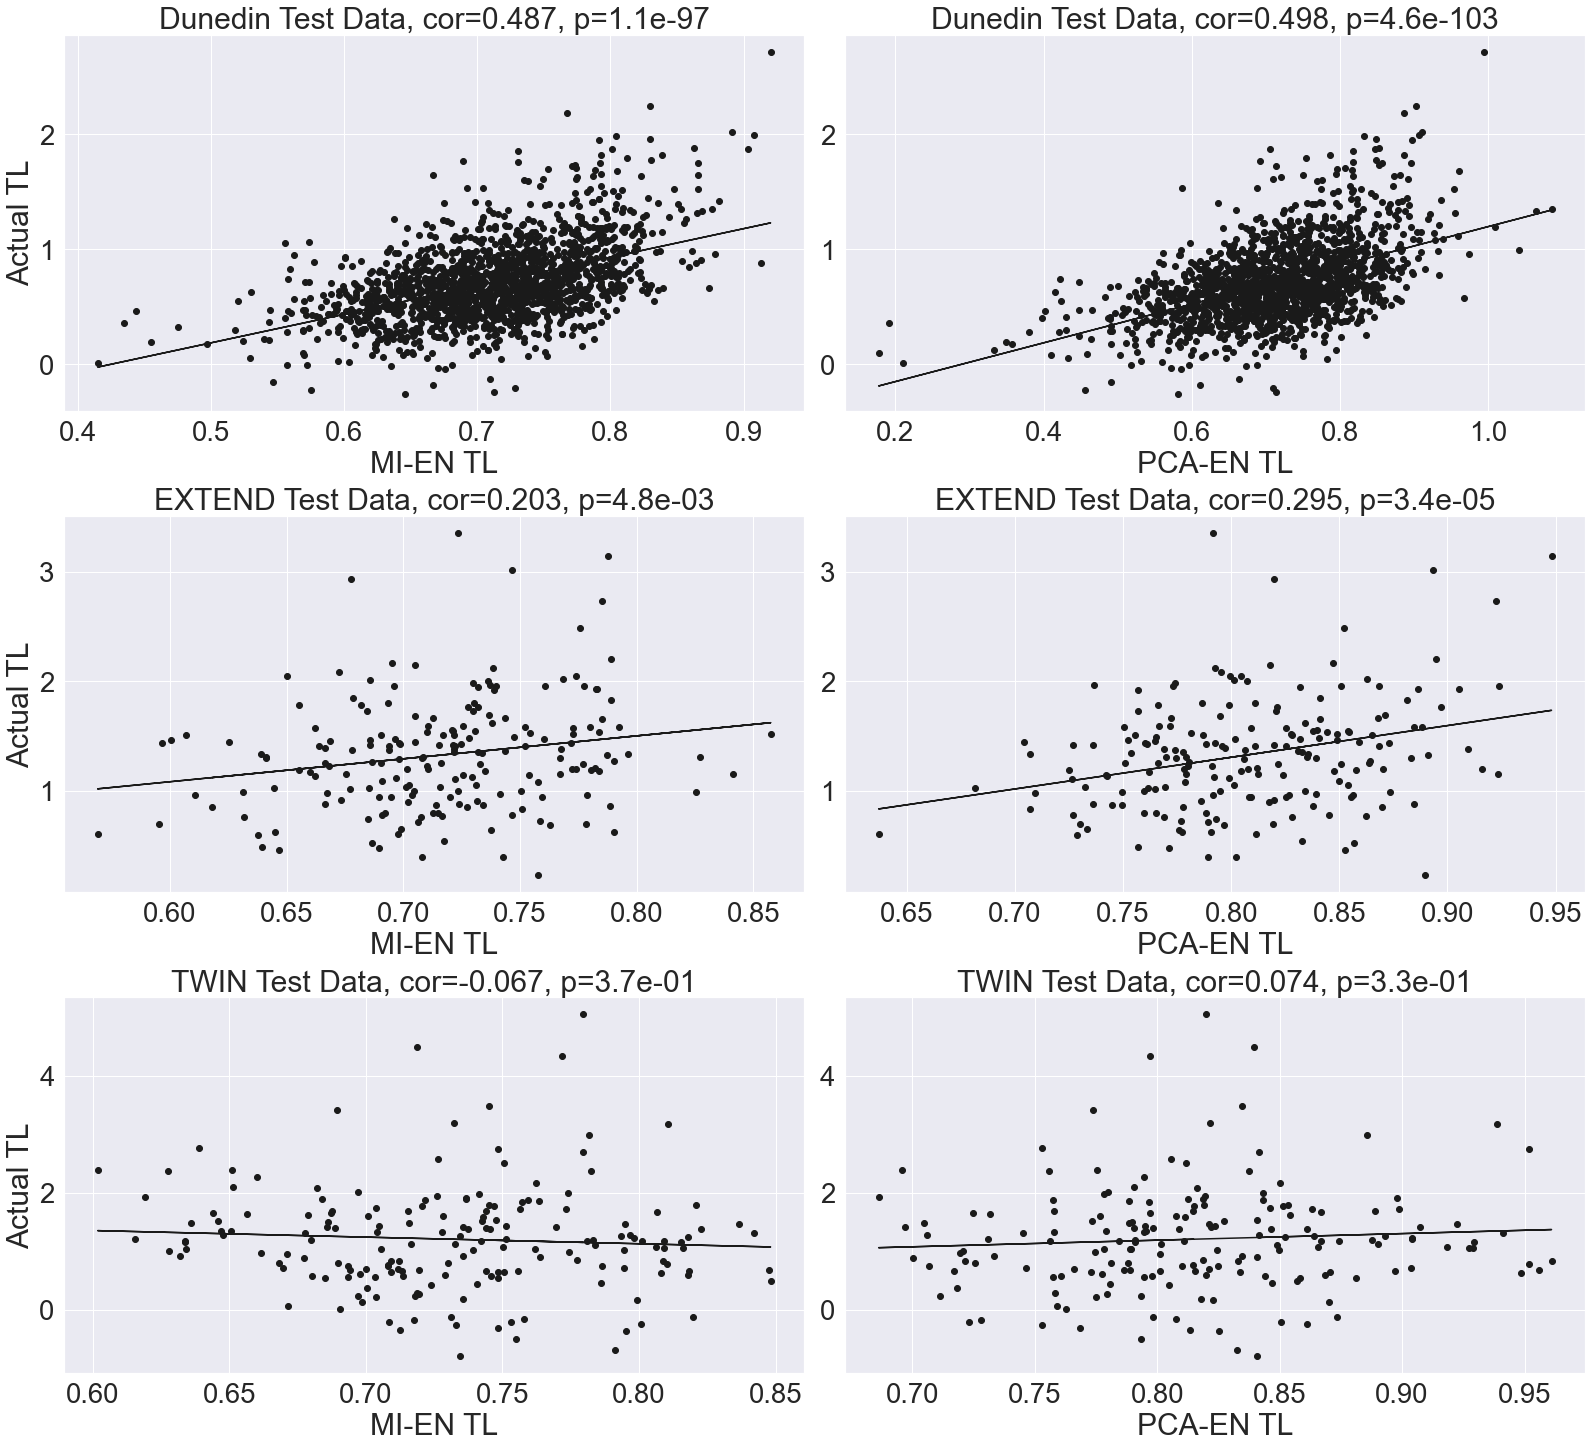

In [67]:
fig, axs = plt.subplots(3, 2, constrained_layout=True)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0,0].scatter(mig_en_dunedin, dunedin_df['Telomere Length'], color='k')
axs[0,0].set_title('Dunedin Test Data, cor=0.487, p=1.1e-97')
m, b = np.polyfit(mig_en_dunedin, dunedin_df['Telomere Length'], 1)
axs[0,0].plot(mig_en_dunedin, m*mig_en_dunedin + b, color='k')

axs[0,1].scatter(pca_en_dunedin['PCA Predicted Dunedin'], dunedin_df['Telomere Length'], color='k')
axs[0,1].set_title('Dunedin Test Data, cor=0.498, p=4.6e-103')
m, b = np.polyfit(pca_en_dunedin['PCA Predicted Dunedin'], dunedin_df['Telomere Length'], 1)
axs[0,1].plot(pca_en_dunedin['PCA Predicted Dunedin'], m*pca_en_dunedin['PCA Predicted Dunedin'] + b, color='k')

axs[1,0].scatter(mig_en_extend, df['NQR'], color='k')
axs[1,0].set_title('EXTEND Test Data, cor=0.203, p=4.8e-03')
m, b = np.polyfit(mig_en_extend.values.flatten(), np.array(df['NQR']), 1)
axs[1,0].plot(mig_en_extend.values, m*mig_en_extend.values + b, color='k')

axs[1,1].scatter(pca_en_extend['PCA Predicted EXTEND'], df['NQR'], color='k')
axs[1,1].set_title('EXTEND Test Data, cor=0.295, p=3.4e-05')
m, b = np.polyfit(pca_en_extend['PCA Predicted EXTEND'].values, np.array(df['NQR']), 1)
axs[1,1].plot(pca_en_extend['PCA Predicted EXTEND'].values, m*pca_en_extend['PCA Predicted EXTEND'].values + b, color='k')

axs[2,0].scatter(mig_en_twin, twin_y['NQR'].values, color='k')
axs[2,0].set_title('TWIN Test Data, cor=-0.067, p=3.7e-01')
m, b = np.polyfit(mig_en_twin.values.flatten(), np.array(twin_y['NQR']), 1)
axs[2,0].plot(mig_en_twin.values, m*mig_en_twin.values + b, color='k')

axs[2,1].scatter(pca_en_twin['PCA Predicted TWIN'], twin_y['NQR'].values, color='k')
axs[2,1].set_title('TWIN Test Data, cor=0.074, p=3.3e-01')
m, b = np.polyfit(pca_en_twin['PCA Predicted TWIN'].values, np.array(twin_y['NQR']), 1)
axs[2,1].plot(pca_en_twin['PCA Predicted TWIN'].values, m*pca_en_twin['PCA Predicted TWIN'].values + b, color='k')


#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0,0].set(xlabel='MI-EN TL', ylabel='Actual TL')
axs[0,1].set(xlabel='PCA-EN TL')
axs[1,0].set(xlabel='MI-EN TL', ylabel='Actual TL')
axs[1,1].set(xlabel='PCA-EN TL')
axs[2,0].set(xlabel='MI-EN TL', ylabel='Actual TL')
axs[2,1].set(xlabel='PCA-EN TL')


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

### Correlation Plots of DNAmAge Acceleration Residual vs. Actual & Estimated TLs 

In [68]:
plt.rcParams.update({'font.size': 40})
plt.rcParams["figure.figsize"] = (24, 24)

In [69]:
# This near-zero correlation shows that regressing age out of the DNAmAge estimates to give the age-acceleration measure, has 
# removed the effect of age from DNAmAge
print('Correlation - EXTEND AgeAcc vs. age: r={}. p={}'.format(pearsonr(df['AgeAccelerationResidual'], df['Age'])[0], pearsonr(df['AgeAccelerationResidual'], df['Age'])[1])) 

Correlation - EXTEND AgeAcc vs. age: r=0.0036593430029550414. p=0.9598240316533608


In [70]:
print('Correlation - EXTEND AgeAcc vs. actual TL: r={}. p={}'.format(pearsonr(df['AgeAccelerationResidual'], df['NQR'])[0], pearsonr(df['AgeAccelerationResidual'], df['NQR'])[1])) 
print('Correlation - EXTEND AgeAcc vs. MIG-EN TL: r={}. p={}'.format(pearsonr(df['AgeAccelerationResidual'], mig_en_extend)[0], pearsonr(df['AgeAccelerationResidual'], mig_en_extend)[1])) 
print('Correlation - EXTEND AgeAcc vs. PCA-EN TL: r={}. p={}'.format(pearsonr(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'])[0], pearsonr(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'])[1])) 
print('Correlation - TWIN AgeAcc vs. actual TL: r={}. p={}'.format(pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['NQR'])[0], pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['NQR'])[1]))
print('Correlation - TWIN AgeAcc vs. MIG-EN TL: r={}. p={}'.format(pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['MIG-EN'])[0], pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['MIG-EN'])[1]))
print('Correlation - TWIN AgeAcc vs. PCA-EN TL: r={}. p={}'.format(pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['PCA-EN'])[0], pearsonr(twin_y_2['AgeAccelerationResidual'], twin_y_2['PCA-EN'])[1]))

Correlation - EXTEND AgeAcc vs. actual TL: r=-0.028988789556087868. p=0.6897890322253007
Correlation - EXTEND AgeAcc vs. MIG-EN TL: r=[-0.14281388152185825]. p=0.04814275657399871
Correlation - EXTEND AgeAcc vs. PCA-EN TL: r=-0.16112827370785876. p=0.025569480599632297


NameError: name 'twin_y_2' is not defined

C:\Users\User\AppData\Local\Temp/ipykernel_2956/1395121139.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


[Text(0.5, 0, 'Age Acceleration (Years)'), Text(0, 0.5, 'PCA-EN TL')]

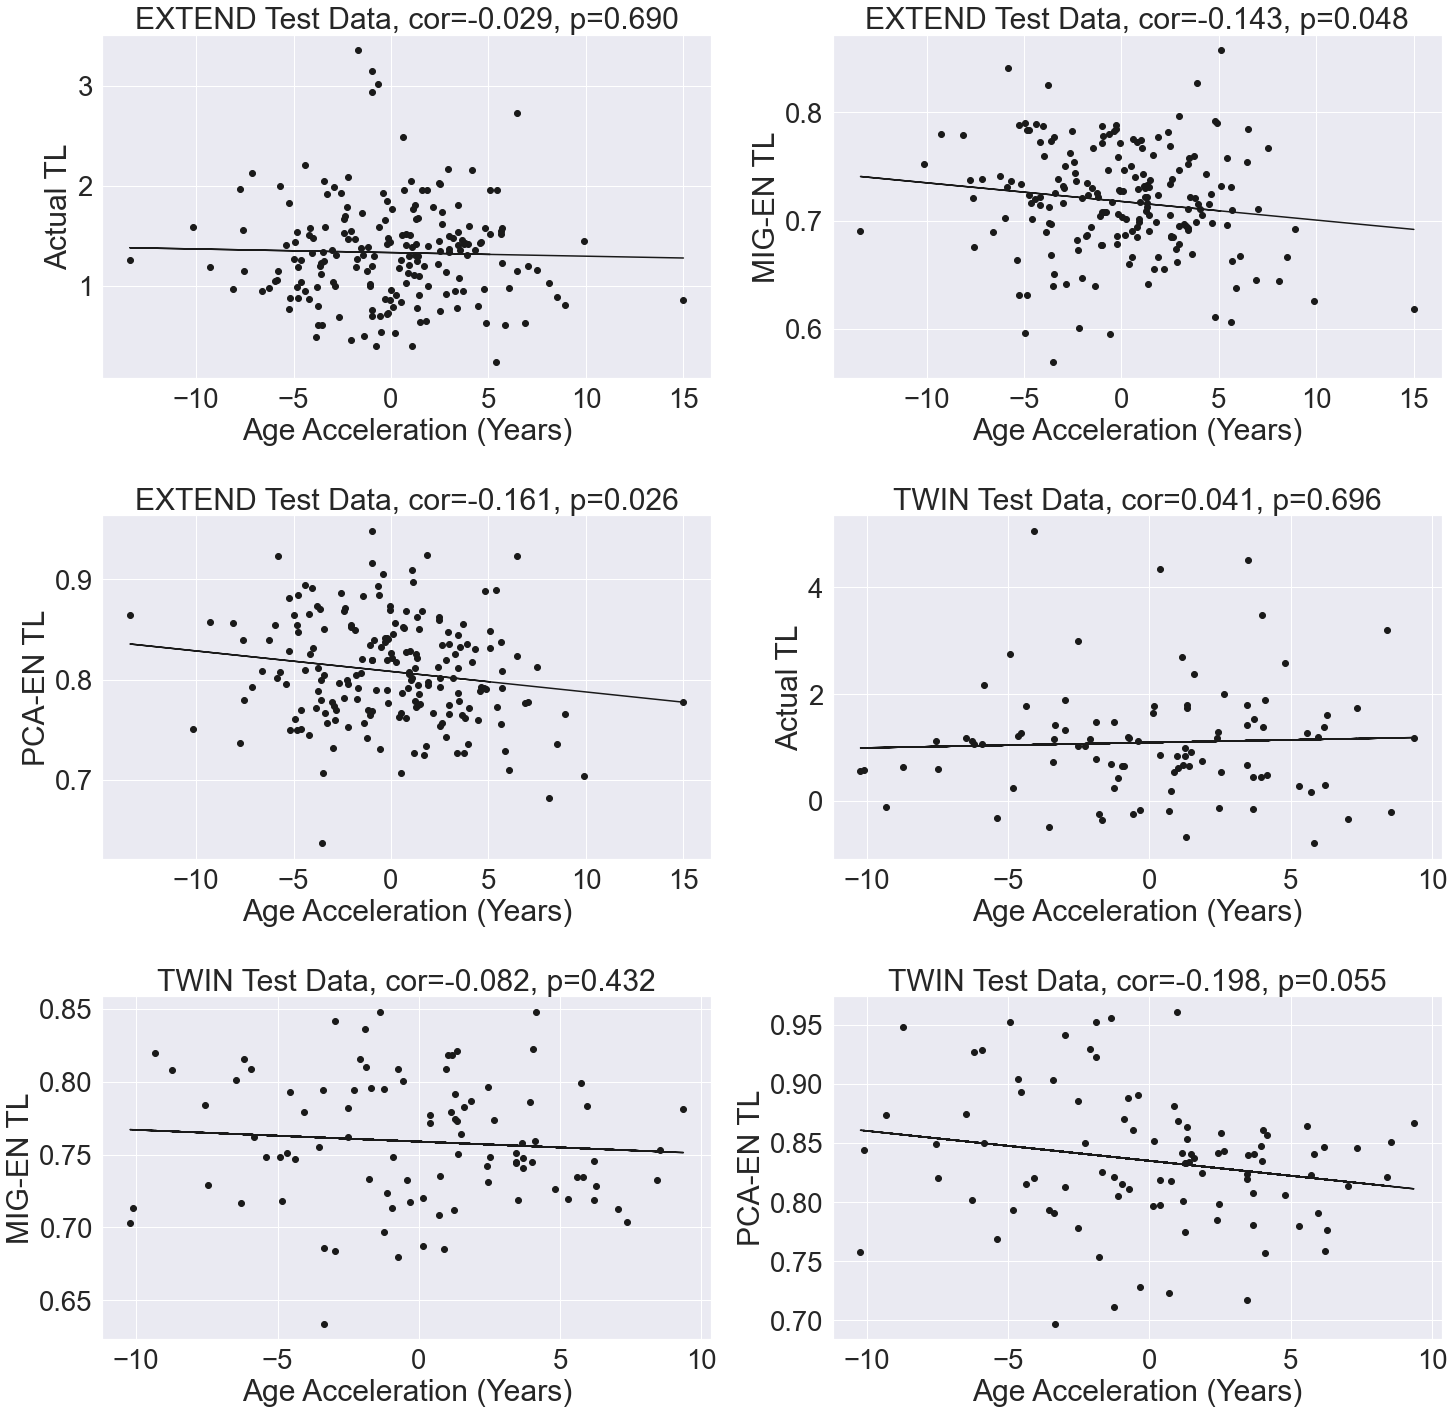

In [71]:
fig, axs = plt.subplots(3, 2, constrained_layout=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0,0].scatter(df['AgeAccelerationResidual'], df['NQR'], color='k')
axs[0,0].set_title('EXTEND Test Data, cor=-0.029, p=0.690')
m, b = np.polyfit(df['AgeAccelerationResidual'], np.array(df['NQR']), 1)
axs[0,0].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

axs[0,1].scatter(df['AgeAccelerationResidual'], mig_en_extend, color='k')
axs[0,1].set_title('EXTEND Test Data, cor=-0.143, p=0.048')
m, b = np.polyfit(df['AgeAccelerationResidual'], mig_en_extend.values.flatten(), 1)
axs[0,1].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

axs[1,0].scatter(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[1,0].set_title('EXTEND Test Data, cor=-0.161, p=0.026')
m, b = np.polyfit(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[1,0].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

twin_y_2 = twin_y.dropna(subset=['Age'])
axs[1,1].scatter(twin_y_2['AgeAccelerationResidual'], twin_y_2['NQR'], color='k')
axs[1,1].set_title('TWIN Test Data, cor=0.041, p=0.696')
m, b = np.polyfit(twin_y_2['AgeAccelerationResidual'], np.array(twin_y_2['NQR']), 1)
axs[1,1].plot(twin_y_2['AgeAccelerationResidual'], m*twin_y_2['AgeAccelerationResidual'] + b, color='k')

axs[2,0].scatter(twin_y_2['AgeAccelerationResidual'], twin_y_2['MIG-EN'], color='k')
axs[2,0].set_title('TWIN Test Data, cor=-0.082, p=0.432')
m, b = np.polyfit(twin_y_2['AgeAccelerationResidual'], twin_y_2['MIG-EN'], 1)
axs[2,0].plot(twin_y_2['AgeAccelerationResidual'], m*twin_y_2['AgeAccelerationResidual'] + b, color='k')

axs[2,1].scatter(twin_y_2['AgeAccelerationResidual'], twin_y_2['PCA-EN'], color='k')
axs[2,1].set_title('TWIN Test Data, cor=-0.198, p=0.055')
m, b = np.polyfit(twin_y_2['AgeAccelerationResidual'], twin_y_2['PCA-EN'], 1)
axs[2,1].plot(twin_y_2['AgeAccelerationResidual'], m*twin_y_2['AgeAccelerationResidual'] + b, color='k')

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0,0].set(xlabel='Age Acceleration (Years)', ylabel='Actual TL')
axs[0,1].set(xlabel='Age Acceleration (Years)', ylabel='MIG-EN TL')
axs[1,0].set(xlabel='Age Acceleration (Years)', ylabel='PCA-EN TL')
axs[1,1].set(xlabel='Age Acceleration (Years)', ylabel='Actual TL')
axs[2,0].set(xlabel='Age Acceleration (Years)', ylabel='MIG-EN TL')
axs[2,1].set(xlabel='Age Acceleration (Years)', ylabel='PCA-EN TL')


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

C:\Users\User\AppData\Local\Temp/ipykernel_2956/75031719.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


[Text(0.5, 0, 'Age Acceleration (Years)'), Text(0, 0.5, 'PCA-EN TL')]

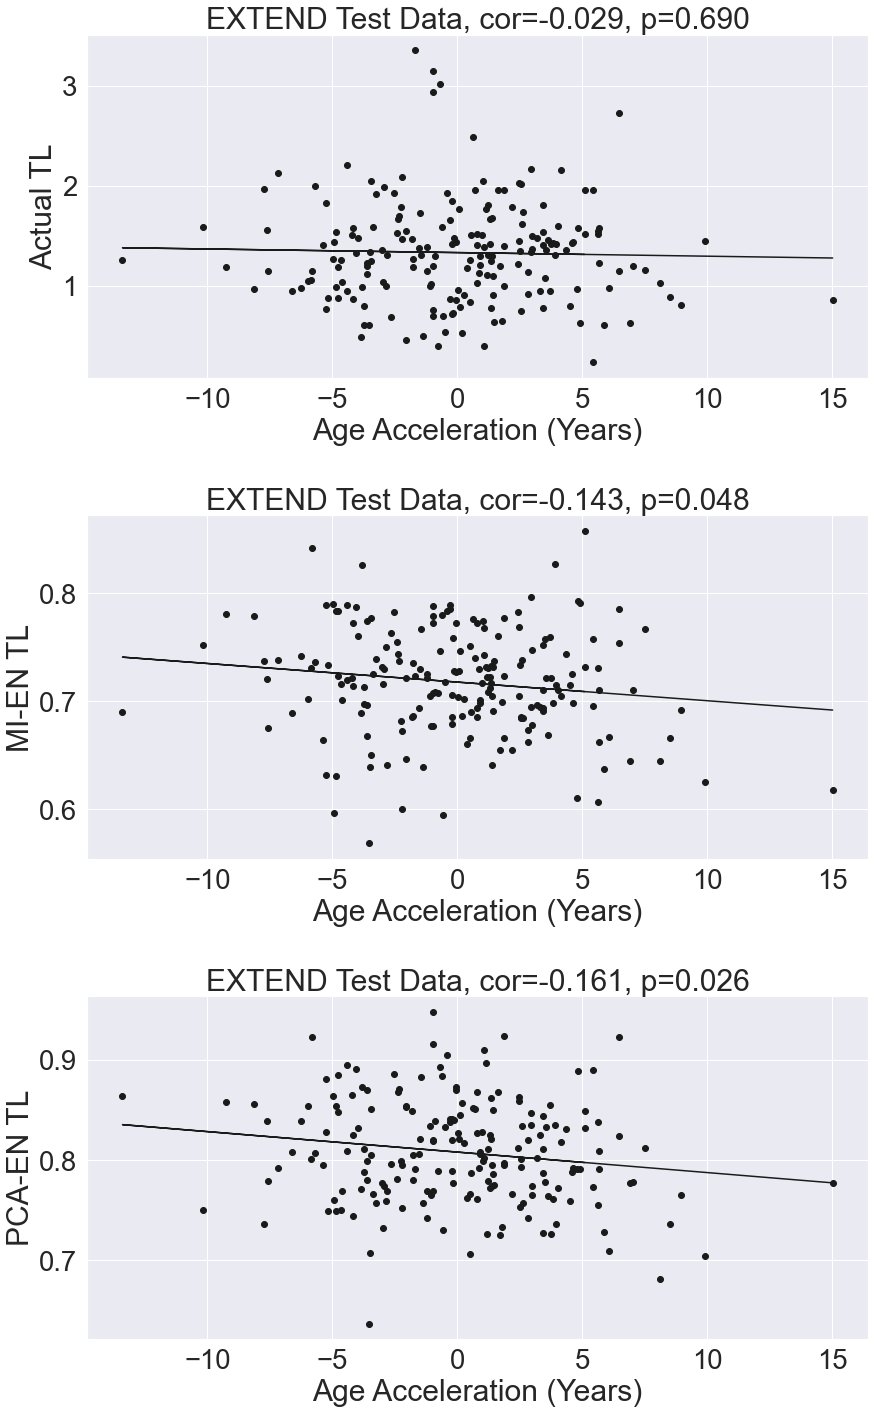

In [72]:
plt.rcParams["figure.figsize"] = (14, 24)
fig, axs = plt.subplots(3, 1, constrained_layout=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0].scatter(df['AgeAccelerationResidual'], df['NQR'], color='k')
axs[0].set_title('EXTEND Test Data, cor=-0.029, p=0.690')
m, b = np.polyfit(df['AgeAccelerationResidual'], np.array(df['NQR']), 1)
axs[0].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

axs[1].scatter(df['AgeAccelerationResidual'], mig_en_extend, color='k')
axs[1].set_title('EXTEND Test Data, cor=-0.143, p=0.048')
m, b = np.polyfit(df['AgeAccelerationResidual'], mig_en_extend.values.flatten(), 1)
axs[1].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

axs[2].scatter(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[2].set_title('EXTEND Test Data, cor=-0.161, p=0.026')
m, b = np.polyfit(df['AgeAccelerationResidual'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[2].plot(df['AgeAccelerationResidual'], m*df['AgeAccelerationResidual'] + b, color='k')

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0].set(xlabel='Age Acceleration (Years)', ylabel='Actual TL')
axs[1].set(xlabel='Age Acceleration (Years)', ylabel='MI-EN TL')
axs[2].set(xlabel='Age Acceleration (Years)', ylabel='PCA-EN TL')


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

### Correlation of Age and TLs (Actual and estimators)

In [73]:
print('Correlation - EXTEND AgeAcc vs. actual TL: r={}. p={}'.format(pearsonr(df['Age'], df['NQR'])[0], pearsonr(df['Age'], df['NQR'])[1])) 
print('Correlation - EXTEND AgeAcc vs. MIG-EN TL: r={}. p={}'.format(pearsonr(df['Age'], mig_en_extend)[0], pearsonr(df['Age'], mig_en_extend)[1])) 
print('Correlation - EXTEND AgeAcc vs. PCA-EN TL: r={}. p={}'.format(pearsonr(df['Age'], pca_en_extend['PCA Predicted EXTEND'])[0], pearsonr(df['Age'], pca_en_extend['PCA Predicted EXTEND'])[1])) 
print('Correlation - TWIN AgeAcc vs. actual TL: r={}. p={}'.format(pearsonr(twin_y_2['Age'], twin_y_2['NQR'])[0], pearsonr(twin_y_2['Age'], twin_y_2['NQR'])[1]))
print('Correlation - TWIN AgeAcc vs. MIG-EN TL: r={}. p={}'.format(pearsonr(twin_y_2['Age'], twin_y_2['MIG-EN'])[0], pearsonr(twin_y_2['Age'], twin_y_2['MIG-EN'])[1]))
print('Correlation - TWIN AgeAcc vs. PCA-EN TL: r={}. p={}'.format(pearsonr(twin_y_2['Age'], twin_y_2['PCA-EN'])[0], pearsonr(twin_y_2['Age'], twin_y_2['PCA-EN'])[1]))


Correlation - EXTEND AgeAcc vs. actual TL: r=-0.21841041788709856. p=0.0023388138831294085
Correlation - EXTEND AgeAcc vs. MIG-EN TL: r=[-0.506413471389525]. p=6.689108503673824e-14
Correlation - EXTEND AgeAcc vs. PCA-EN TL: r=-0.5648953692896663. p=1.405494797636661e-17
Correlation - TWIN AgeAcc vs. actual TL: r=0.12808396330527422. p=0.21859256849476444
Correlation - TWIN AgeAcc vs. MIG-EN TL: r=-0.5120542554096303. p=1.3260981632219115e-07
Correlation - TWIN AgeAcc vs. PCA-EN TL: r=-0.5198442595382614. p=7.899979361898043e-08


C:\Users\User\AppData\Local\Temp/ipykernel_2956/2499370808.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


[Text(0.5, 0, 'Age (Years)'), Text(0, 0.5, 'PCA-EN TL')]

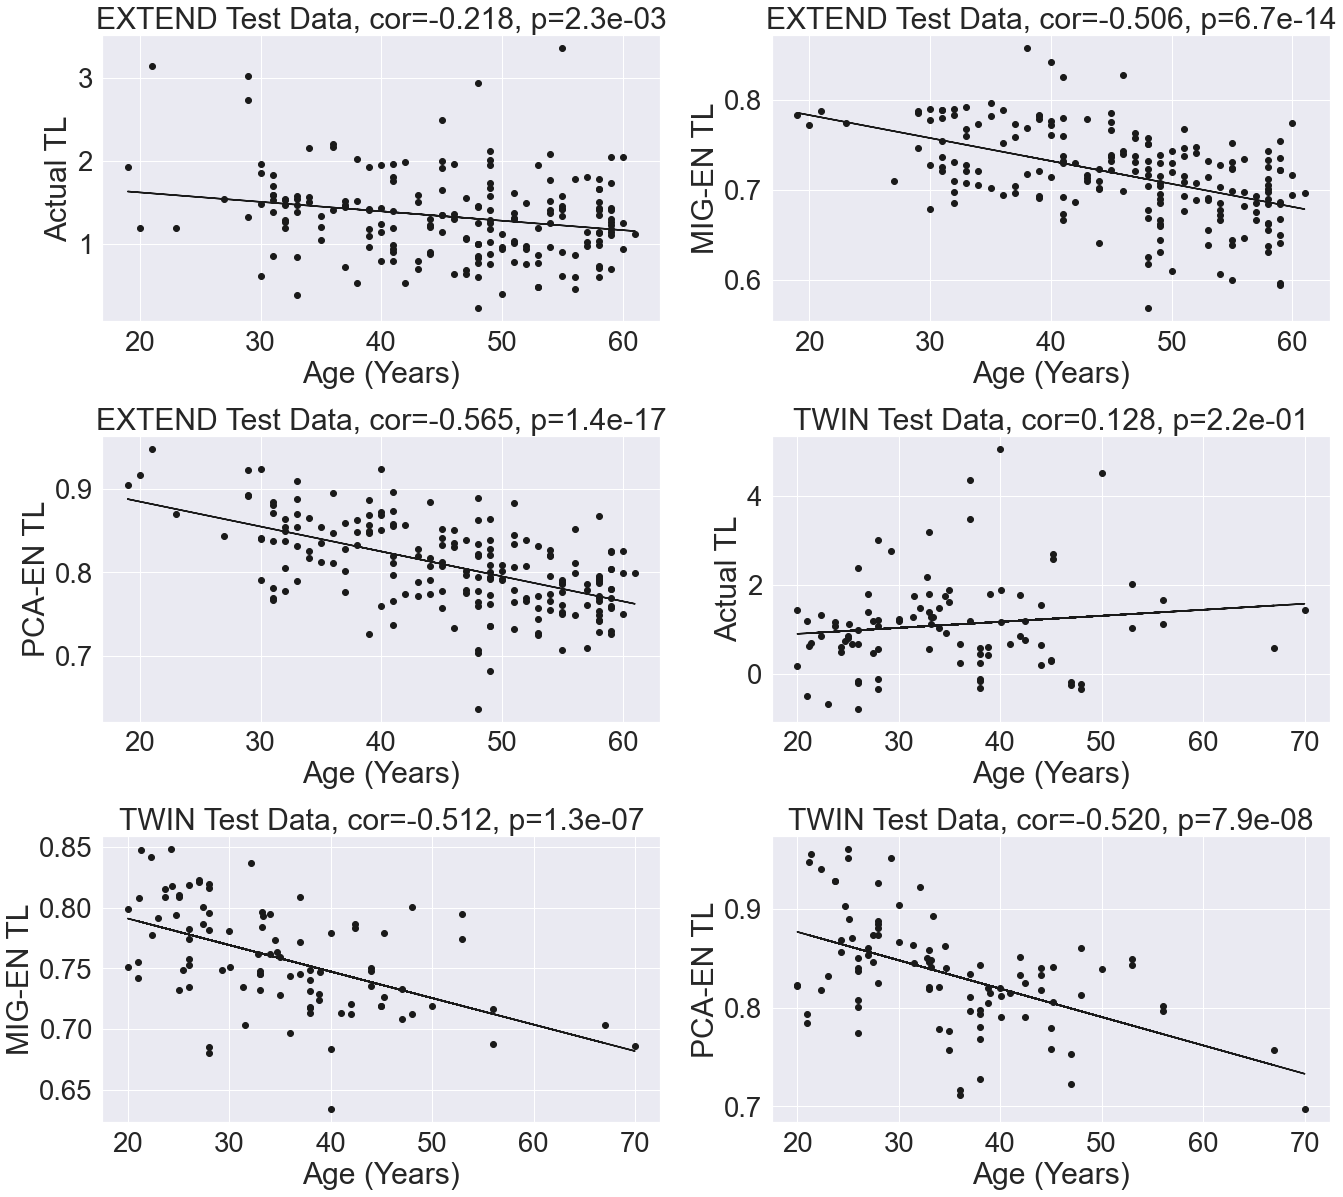

In [74]:
plt.rcParams["figure.figsize"] = (22,20)
fig, axs = plt.subplots(3, 2, constrained_layout=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0,0].scatter(df['Age'], df['NQR'], color='k')
axs[0,0].set_title('EXTEND Test Data, cor=-0.218, p=2.3e-03')
m, b = np.polyfit(df['Age'], np.array(df['NQR']), 1)
axs[0,0].plot(df['Age'], m*df['Age'] + b, color='k')

axs[0,1].scatter(df['Age'], mig_en_extend, color='k')
axs[0,1].set_title('EXTEND Test Data, cor=-0.506, p=6.7e-14')
m, b = np.polyfit(df['Age'], mig_en_extend.values.flatten(), 1)
axs[0,1].plot(df['Age'], m*df['Age'] + b, color='k')

axs[1,0].scatter(df['Age'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[1,0].set_title('EXTEND Test Data, cor=-0.565, p=1.4e-17')
m, b = np.polyfit(df['Age'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[1,0].plot(df['Age'], m*df['Age'] + b, color='k')

twin_y_2 = twin_y.dropna(subset=['Age'])
axs[1,1].scatter(twin_y_2['Age'], twin_y_2['NQR'], color='k')
axs[1,1].set_title('TWIN Test Data, cor=0.128, p=2.2e-01')
m, b = np.polyfit(twin_y_2['Age'], np.array(twin_y_2['NQR']), 1)
axs[1,1].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

axs[2,0].scatter(twin_y_2['Age'], twin_y_2['MIG-EN'], color='k')
axs[2,0].set_title('TWIN Test Data, cor=-0.512, p=1.3e-07')
m, b = np.polyfit(twin_y_2['Age'], twin_y_2['MIG-EN'], 1)
axs[2,0].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

axs[2,1].scatter(twin_y_2['Age'], twin_y_2['PCA-EN'], color='k')
axs[2,1].set_title('TWIN Test Data, cor=-0.520, p=7.9e-08')
m, b = np.polyfit(twin_y_2['Age'], twin_y_2['PCA-EN'], 1)
axs[2,1].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0,0].set(xlabel='Age (Years)', ylabel='Actual TL')
axs[0,1].set(xlabel='Age (Years)', ylabel='MIG-EN TL')
axs[1,0].set(xlabel='Age (Years)', ylabel='PCA-EN TL')
axs[1,1].set(xlabel='Age (Years)', ylabel='Actual TL')
axs[2,0].set(xlabel='Age (Years)', ylabel='MIG-EN TL')
axs[2,1].set(xlabel='Age (Years)', ylabel='PCA-EN TL')


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

C:\Users\User\AppData\Local\Temp/ipykernel_2956/4068943966.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


[Text(0.5, 0, 'Age (Years)'), Text(0, 0.5, 'PCA-EN TL')]

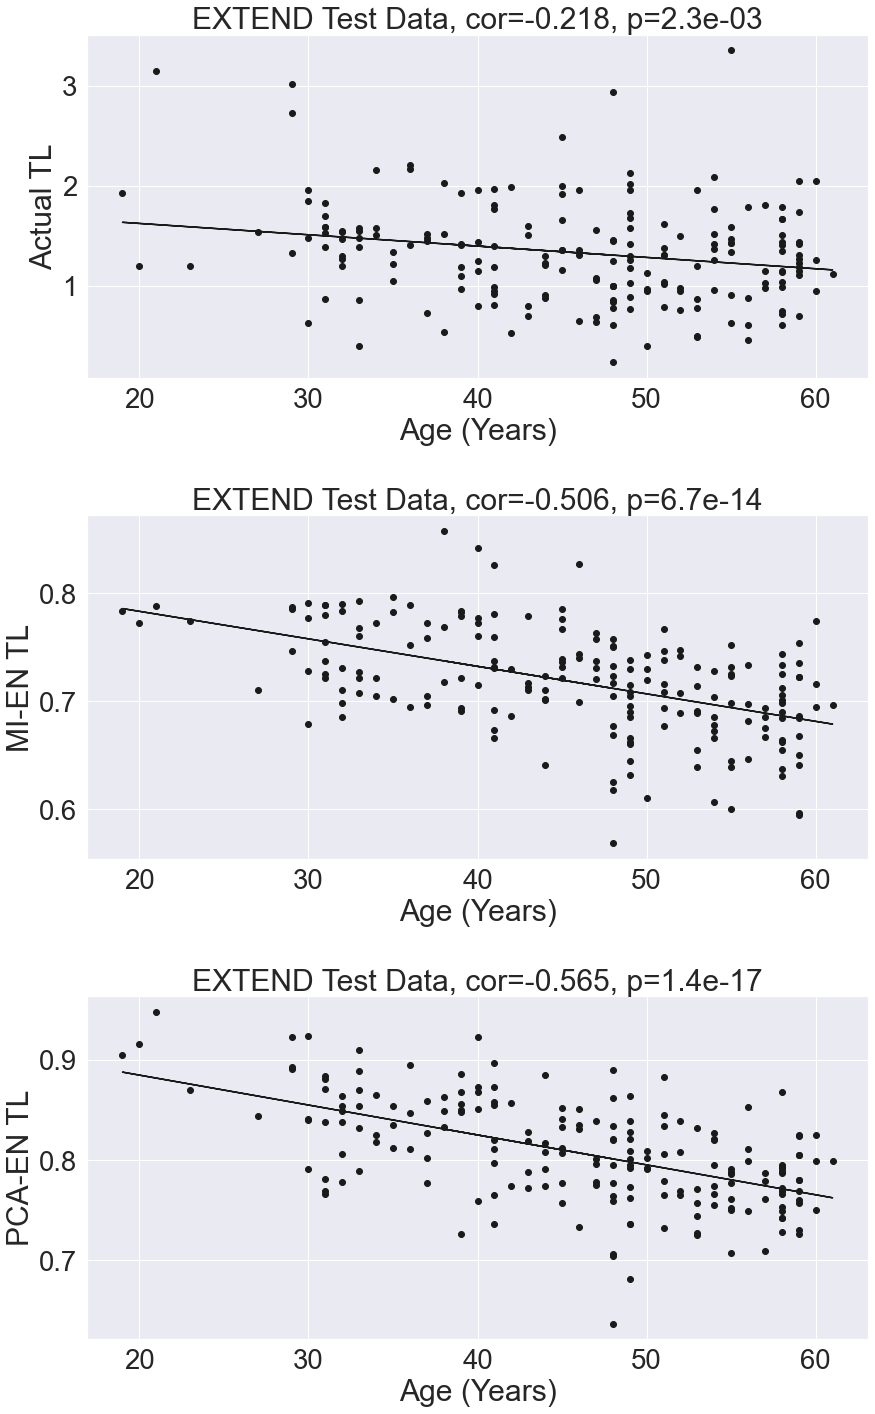

In [75]:
plt.rcParams["figure.figsize"] = (14,24)
fig, axs = plt.subplots(3, 1, constrained_layout=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0].scatter(df['Age'], df['NQR'], color='k')
axs[0].set_title('EXTEND Test Data, cor=-0.218, p=2.3e-03')
m, b = np.polyfit(df['Age'], np.array(df['NQR']), 1)
axs[0].plot(df['Age'], m*df['Age'] + b, color='k')

axs[1].scatter(df['Age'], mig_en_extend, color='k')
axs[1].set_title('EXTEND Test Data, cor=-0.506, p=6.7e-14')
m, b = np.polyfit(df['Age'], mig_en_extend.values.flatten(), 1)
axs[1].plot(df['Age'], m*df['Age'] + b, color='k')

axs[2].scatter(df['Age'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[2].set_title('EXTEND Test Data, cor=-0.565, p=1.4e-17')
m, b = np.polyfit(df['Age'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[2].plot(df['Age'], m*df['Age'] + b, color='k')

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0].set(xlabel='Age (Years)', ylabel='Actual TL')
axs[1].set(xlabel='Age (Years)', ylabel='MI-EN TL')
axs[2].set(xlabel='Age (Years)', ylabel='PCA-EN TL')

***

# 7. Dunedin actual blood cell counts correlation with TLs

In [76]:
# 2 rows have missing values for neutrophils
dunedin_df['Neutrophils'] = np.where(dunedin_df['Age'] == 26, dunedin_df['neutro26np'], dunedin_df['Neutrophils38np'])
# 4 rows have missing values for lymphocytes
dunedin_df['Lymphocytes'] = np.where(dunedin_df['Age'] == 26, dunedin_df['lymph26np'], dunedin_df['lymphocytes38np'])
# 109 rows have missing values for monocytes
dunedin_df['Monocytes'] = np.where(dunedin_df['Age'] == 26, dunedin_df['mono26np'], dunedin_df['monocytes38np'])
# 109 rows have missing values for eosinophils
dunedin_df['Eosinophils'] = np.where(dunedin_df['Age'] == 26, dunedin_df['eosino26np'], dunedin_df['Eosinophils38np'])
# 109 rows have missing values for basophils
dunedin_df['Basophils'] = np.where(dunedin_df['Age'] == 26, dunedin_df['baso26np'], dunedin_df['basophils38np'])

## 7.1. Correlation for repeated measures
### https://pingouin-stats.org/generated/pingouin.rm_corr.html 
### (This uses non-age-adjusted TLs)

## Any missing values or instances with zero counts are removed from correlation analysis

In [77]:
# Correlation for repeated measures data - Blood cells vs. Telomere Length (unadjusted for age)
vars = ['Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils']
for var in vars:
    tmp = dunedin_df.dropna(subset=[var])
    tmp = tmp[tmp[var] != 0]
    print('Repeated measures correlation between TL and {}: \n{}'.format(var,
        pg.rm_corr(data=tmp, x=var, y='Telomere Length', subject='snum')))

Repeated measures correlation between TL and Neutrophils: 
                r  dof      pval          CI95%     power
rm_corr -0.035353  726  0.340828  [-0.11, 0.04]  0.158709
Repeated measures correlation between TL and Lymphocytes: 
                r  dof      pval          CI95%     power
rm_corr -0.035842  726  0.334191  [-0.11, 0.04]  0.161823
Repeated measures correlation between TL and Monocytes: 
                r  dof      pval           CI95%     power
rm_corr -0.094216  698  0.012638  [-0.17, -0.02]  0.704161
Repeated measures correlation between TL and Eosinophils: 
               r  dof      pval           CI95%     power
rm_corr -0.14973  674  0.000093  [-0.22, -0.08]  0.974794
Repeated measures correlation between TL and Basophils: 
               r  dof     pval           CI95%     power
rm_corr -0.24249  101  0.01359  [-0.42, -0.05]  0.700137


In [78]:
# Correlation for repeated measures data - Blood cells vs. mig_en_tl (unadjusted for age)
vars = ['Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils']
for var in vars:
    tmp = dunedin_df.dropna(subset=[var])
    tmp = tmp[tmp[var] != 0]
    print('Repeated measures correlation between TL and {}: \n{}'.format(var,
        pg.rm_corr(data=tmp, x=var, y='MIG-EN TL', subject='snum')))

Repeated measures correlation between TL and Neutrophils: 
                r  dof      pval          CI95%     power
rm_corr -0.054243  726  0.143708  [-0.13, 0.02]  0.309843
Repeated measures correlation between TL and Lymphocytes: 
                r  dof      pval           CI95%     power
rm_corr -0.134778  726  0.000265  [-0.21, -0.06]  0.954827
Repeated measures correlation between TL and Monocytes: 
                r  dof      pval           CI95%     power
rm_corr -0.152055  698  0.000054  [-0.22, -0.08]  0.981622
Repeated measures correlation between TL and Eosinophils: 
                r  dof      pval           CI95%     power
rm_corr -0.096456  674  0.012105  [-0.17, -0.02]  0.709452
Repeated measures correlation between TL and Basophils: 
                r  dof      pval           CI95%     power
rm_corr -0.408431  101  0.000018  [-0.56, -0.23]  0.991713


In [79]:
# Correlation for repeated measures data - Blood cells vs. Telomere Length (unadjusted for age)
vars = ['Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils']
for var in vars:
    tmp = dunedin_df.dropna(subset=[var])
    tmp = tmp[tmp[var] != 0]
    print('Repeated measures correlation between TL and {}: \n{}'.format(var,
        pg.rm_corr(data=tmp, x=var, y='PCA-EN TL', subject='snum')))

Repeated measures correlation between TL and Neutrophils: 
                r  dof      pval          CI95%     power
rm_corr -0.020591  726  0.579114  [-0.09, 0.05]  0.085922
Repeated measures correlation between TL and Lymphocytes: 
                r  dof      pval          CI95%    power
rm_corr -0.133714  726  0.000297  [-0.2, -0.06]  0.95198
Repeated measures correlation between TL and Monocytes: 
                r  dof      pval           CI95%     power
rm_corr -0.156738  698  0.000031  [-0.23, -0.08]  0.986626
Repeated measures correlation between TL and Eosinophils: 
                r  dof          pval           CI95%     power
rm_corr -0.194311  674  3.555165e-07  [-0.27, -0.12]  0.999182
Repeated measures correlation between TL and Basophils: 
                r  dof      pval          CI95%     power
rm_corr -0.382409  101  0.000067  [-0.54, -0.2]  0.981522


***

In [80]:
# Remove missing and zero values
dunedin_df_neutro = dunedin_df.dropna(subset=['Neutrophils'])
dunedin_df_neutro = dunedin_df_neutro[dunedin_df_neutro['Neutrophils'] != 0]
dunedin_df_lymph = dunedin_df.dropna(subset=['Lymphocytes'])
dunedin_df_lymph = dunedin_df_lymph[dunedin_df_lymph['Lymphocytes'] != 0]
dunedin_df_mono = dunedin_df.dropna(subset=['Monocytes'])
dunedin_df_mono = dunedin_df_mono[dunedin_df_mono['Monocytes'] != 0]
dunedin_df_eosin = dunedin_df.dropna(subset=['Eosinophils'])
dunedin_df_eosin = dunedin_df_eosin[dunedin_df_eosin['Eosinophils'] != 0]
dunedin_df_baso = dunedin_df.dropna(subset=['Basophils'])
dunedin_df_baso = dunedin_df_baso[dunedin_df_baso['Basophils'] != 0]

## 7.2. Plots of monocytes to show correlation

In [81]:
plt.rc('font', size=40)          # controls default text sizes
plt.rc('axes', titlesize=40)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=40)    # fontsize of the tick labels
plt.rc('ytick', labelsize=40)    # fontsize of the tick labels
plt.rc('legend', fontsize=40)    # legend fontsize
plt.rc('figure', titlesize=40)  # fontsize of the figure title

C:\Users\User\AppData\Local\Temp/ipykernel_2956/277317011.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)


[Text(0.5, 0, 'Estimated Monocyte Count'), Text(0, 0.5, 'PCA-EN TL')]

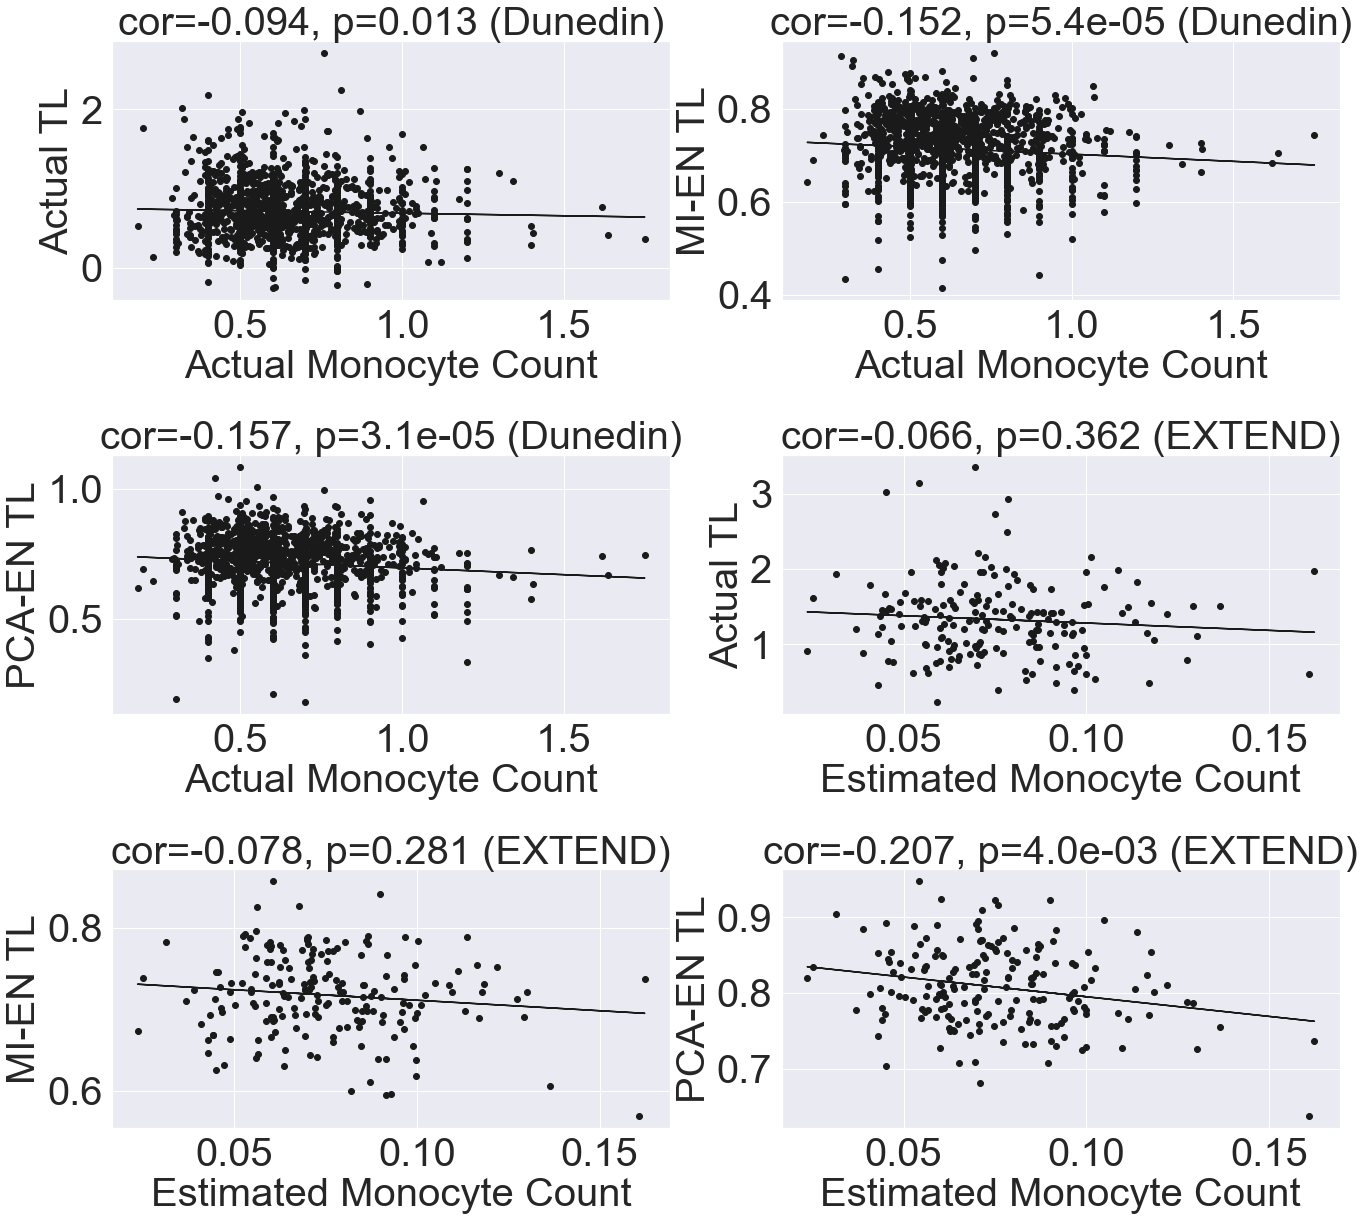

In [82]:
plt.rcParams["figure.figsize"] = (22,20)
fig, axs = plt.subplots(3, 2, constrained_layout=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)

axs[0,0].scatter(dunedin_df_mono['Monocytes'], dunedin_df_mono['Telomere Length'], color='k')
axs[0,0].set_title('cor=-0.094, p=0.013 (Dunedin)', fontsize=40)
m, b = np.polyfit(dunedin_df_mono['Monocytes'], dunedin_df_mono['Telomere Length'], 1)
axs[0,0].plot(dunedin_df_mono['Monocytes'], m*dunedin_df_mono['Monocytes'] + b, color='k')

axs[0,1].scatter(dunedin_df_mono['Monocytes'], dunedin_df_mono['MIG-EN TL'], color='k')
axs[0,1].set_title('cor=-0.152, p=5.4e-05 (Dunedin)', fontsize=40)
m, b = np.polyfit(dunedin_df_mono['Monocytes'], dunedin_df_mono['MIG-EN TL'], 1)
axs[0,1].plot(dunedin_df_mono['Monocytes'], m*dunedin_df_mono['Monocytes'] + b, color='k')

axs[1,0].scatter(dunedin_df_mono['Monocytes'], dunedin_df_mono['PCA-EN TL'], color='k')
axs[1,0].set_title('cor=-0.157, p=3.1e-05 (Dunedin)', fontsize=40)
m, b = np.polyfit(dunedin_df_mono['Monocytes'], dunedin_df_mono['PCA-EN TL'], 1)
axs[1,0].plot(dunedin_df_mono['Monocytes'], m*dunedin_df_mono['Monocytes'] + b, color='k')

axs[1,1].scatter(df['Mono'], df['NQR'], color='k')
axs[1,1].set_title('cor=-0.066, p=0.362 (EXTEND)', fontsize=40)
m, b = np.polyfit(df['Mono'], np.array(df['NQR']), 1)
axs[1,1].plot(df['Mono'], m*df['Mono'] + b, color='k')

axs[2,0].scatter(df['Mono'], mig_en_extend, color='k')
axs[2,0].set_title('cor=-0.078, p=0.281 (EXTEND)', fontsize=40)
m, b = np.polyfit(df['Mono'], mig_en_extend, 1)
axs[2,0].plot(df['Mono'], m*df['Mono'] + b, color='k')

axs[2,1].scatter(df['Mono'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[2,1].set_title('cor=-0.207, p=4.0e-03 (EXTEND)', fontsize=40)
m, b = np.polyfit(df['Mono'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[2,1].plot(df['Mono'], m*df['Mono'] + b, color='k')

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0,0].set(xlabel='Actual Monocyte Count', ylabel='Actual TL')
axs[0,1].set(xlabel='Actual Monocyte Count', ylabel='MI-EN TL')
axs[1,0].set(xlabel='Actual Monocyte Count', ylabel='PCA-EN TL')
axs[1,1].set(xlabel='Estimated Monocyte Count', ylabel='Actual TL')
axs[2,0].set(xlabel='Estimated Monocyte Count', ylabel='MI-EN TL')
axs[2,1].set(xlabel='Estimated Monocyte Count', ylabel='PCA-EN TL')


# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

# 8. Two CpGs overlap between Lu estimator and our MIG-EN estimator

In [83]:
# Read in CpG signature from Lu & Horvath paper
lu_df = pd.read_csv("lu_140_cpg.csv")
lu_variables = list(lu_df['Variable'])

In [84]:
# Out MIG-EN CpG signature
mig_en_variables = mig_en_coeffs[mig_en_coeffs['Coefficients'] != 0]['Feature Names']

In [85]:
# Intersection of Lu and MIG-EN signatures
list(set(lu_variables) & set(mig_en_variables))

['cg24049493', 'Intercept', 'cg27093918']

In [86]:
dunedin_df

,cg09046370,cg16167639,cg09084370,cg12648893,cg02479842,cg16480692,cg13783434,cg01655781,cg22501243,cg25063710,...,Ptot38N,Telomere_pheno_M$TeloBld26,Telomere_pheno_M$TelomBld38,MIG-EN TL,PCA-EN TL,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils
1631,0.788977,0.906226,0.035170,0.905197,0.801359,0.013476,0.201193,0.097449,0.894588,0.084262,...,0.000000,1.48410,1.2362,0.782739,0.794465,4.731,2.739,0.747,0.083,0.000
1630,0.760646,0.873115,0.041605,0.931571,0.770023,0.019911,0.233481,0.124578,0.896597,0.088238,...,0.000000,1.48410,1.2362,0.725285,0.691907,5.300,2.800,0.700,0.300,0.000
250,0.826955,0.889168,0.039733,0.922968,0.843107,0.010670,0.242461,0.131121,0.915994,0.058289,...,NaN,1.22155,NaN,0.813527,0.791574,2.790,1.080,0.540,0.090,0.000
1177,0.826153,0.910572,0.034171,0.915740,0.810807,0.015877,0.138614,0.119458,0.885055,0.062922,...,NaN,NaN,1.1009,0.606362,0.553592,0.000,0.000,NaN,NaN,NaN
391,0.782238,0.892054,0.029691,0.915201,0.856096,0.022898,0.150167,0.121429,0.906531,0.375584,...,NaN,1.26940,NaN,0.739099,0.656089,4.510,2.542,0.820,0.328,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0.724249,0.896290,0.034219,0.905671,0.894833,0.015946,0.215774,0.120189,0.897937,0.057253,...,24.062500,0.93950,1.3031,0.712513,0.640095,5.520,3.036,0.552,0.092,0.000
429,0.789210,0.885247,0.022764,0.904904,0.870006,0.011481,0.172773,0.093600,0.900569,0.046638,...,0.000000,0.98930,1.6176,0.771171,0.825623,4.884,1.776,0.518,0.148,0.074
428,0.726596,0.872846,0.027743,0.903338,0.833879,0.012576,0.177996,0.106589,0.894080,0.045375,...,0.000000,0.98930,1.6176,0.774512,0.807095,3.800,2.100,0.600,0.100,0.000
778,0.842847,0.909092,0.038312,0.931736,0.899872,0.018767,0.149786,0.097730,0.903482,0.433994,...,6.383333,0.97340,1.4046,0.640420,0.561338,5.600,1.700,0.700,0.000,0.000


### Review Point from Reviewer 2

In [87]:
# Second, within the TWIN dataset, I would like to see comparative performance in both the correlation with age (if there
# is much variation in this) and between TWINs (TL is highly heritable). This will help to establish to what degree the poor
# performance in the TWIN data is due to the qPCR TL measures being poor or not. E.g. if good external validity is shown for
# DNAmTL measures but not qPCR TL than this suggests DNAmTL is working ok (and various versions of DNAmTL measures may be
# productively compared) versus the data set being unhelpful overall.

In [88]:
twin_y = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/schizophrenia/static/EMMA_pheno_twins.csv', index_col=0)
twin_nqr = pd.read_csv('C:/Users/User/Desktop/D Drive/epigenetic_ML/fs_paper/local_scripts/static/plate_adj_TL_TWIN.df2.csv')

nqr_id_map = dict(zip(twin_nqr['X.1'], twin_nqr['Adjusted TL (Plate ID']))
twin_y['NQR'] = twin_y['X.1'].map(nqr_id_map)
twin_y['SMOKER_QUANTITY_PER_DAY'] = twin_y['SMOKER_QUANTITY_PER_DAY'].fillna(0)
### Read in predictions files
mig_en_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tlMIG.csv', index_col=0)
pca_en_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_PCA.csv', index_col=0)
twin_y['MIG-EN'] = mig_en_twin.values; twin_y['PCA-EN'] = pca_en_twin['PCA Predicted TWIN'].values

In [89]:
# 84 of the twin samples have no age available - 94 available with age
twin_y_sub = twin_y[twin_y['Age'].notnull()]

In [90]:
# Assess correlations with age for those with 'Age' available
# Correlation with actual TL
print('Correlation between age and actual TL: {}'.format(np.round(pearsonr(twin_y_sub['Age'], twin_y_sub['NQR']), 6))) 
# Correlation with MIG-EN TL
print('Correlation between age and MIG-EN TL: {}'.format(np.round(pearsonr(twin_y_sub['Age'], twin_y_sub['MIG-EN']), 10))) 
# Correlation with PCA-EN TL
print('Correlation between age and PCA-EN TL: {}'.format(np.round(pearsonr(twin_y_sub['Age'], twin_y_sub['PCA-EN']), 10))) 

Correlation between age and actual TL: [0.128084 0.218593]
Correlation between age and MIG-EN TL: [-5.12054255e-01  1.32600000e-07]
Correlation between age and PCA-EN TL: [-5.1984426e-01  7.9000000e-08]


In [91]:
twin_y['Twin Count'] = twin_y.groupby(['Twin.ID'])['Twin.ID'].transform('count')
twin_y_pairs = twin_y[twin_y['Twin Count'] == 2].sort_values('Twin.ID')

twins_first = twin_y_pairs.drop_duplicates(subset=['Twin.ID'], keep='first')
twins_second = twin_y_pairs.drop_duplicates(subset=['Twin.ID'], keep='last')

In [92]:
# Get correlation between the actual TL of TWINS
print('Correlation between actual TL of twin pairs: {}'.format(np.round(pearsonr(twins_first['NQR'], twins_second['NQR']), 7)))
# Get correlation between the MIG-EN TL of TWINS
print('Correlation between MIG-EN TL of twin pairs: {}'.format(np.round(pearsonr(twins_first['MIG-EN'], twins_second['MIG-EN']), 30)))
# Get correlation between the PCA-EN TL of TWINS
print('Correlation between PCA-EN TL of twin pairs: {}'.format(np.round(pearsonr(twins_first['PCA-EN'], twins_second['PCA-EN']), 30)))


Correlation between actual TL of twin pairs: [3.838816e-01 2.869000e-04]
Correlation between MIG-EN TL of twin pairs: [8.56126201e-01 1.62243000e-25]
Correlation between PCA-EN TL of twin pairs: [8.27818081e-01 1.52947693e-22]


In [93]:
pearsonr(twins_first['NQR'], twins_second['NQR'])

(0.3838816001456049, 0.00028694203231046614)

***

## Generate confidence intervals for correlations (using 83.4% C.I method) from https://doi.org/10.1007/s10654-011-9563-8 

In [94]:
def calculate_confidence_intervals(arr1, arr2):
    """Method for calculating C.Is.
    
    This method is defined in the paper 
    https://doi.org/10.1007/s10654-011-9563-8.
    It involves calculating an adjusted z-score using
    the actual correlation and the ratio of the s.d.
    of both arrays on which the correlation is calculated.
    The adjusted z-score is then used to look up the 
    corresponding confidence level - this is then
    used to find the associated C.I. whichis reported
    instead of the 95% interval. 
    """
    import scipy
    # Get ratio of s.d. between both arrays
    sd_ratio = np.std(arr1) / np.std(arr2)
    # Correlation
    corr, pvalue = pearsonr(arr1, arr2)
    # 95% C.I z score
    z_score_95 = 1.96
    # Calculate adjusted z score
    
    z_score_adj = z_score_95 * (np.sqrt(1 - 2 * corr * sd_ratio + sd_ratio**2) / (1 + sd_ratio))
    prob = scipy.stats.norm.sf(abs(z_score_adj)) # One sided
    # Use the 1-sided probability to calculate the confidence level of the adjusted z_score
    conf_level_adj = 1 - 2 * prob
    
    # After finding the adjusted confidence level that corresponds, we can calculate the new
    # C.I. using the steps outlined when you use the online calculator:
    # https://www.statskingdom.com/correlation-confidence-interval-calculator.html#:~:text=What%20is%20a%20correlation%20confidence,is%20called%20the%20confidence%20level.
    # Transform the correlation using Fisher's transfromation:
    z_r = np.log((1 + corr) / (1 - corr)) / 2
    # Calculate the s.d. of the transformed correlation
    z_r_sd = 1 / (np.sqrt(len(arr1) - 3))
    # Calculate the confidence interval using the z statistic
    ci = z_score_adj * z_r_sd 
    # Find log upper and lower bounds
    low = z_r - ci
    high = z_r + + ci
    # Transfrom back the lower and upper limits to the correlation scale
    ci_low = (np.exp(2*low) - 1) / (np.exp(2*low) + 1) # this is tanh(low)
    ci_high = (np.exp(2*high) - 1) / (np.exp(2*high) + 1) # this is tanh(high)
    
    # To do it manually:
    # Critical value corresponding to the adjusted z score - this is looked up in C.I. tables
    # e.g. like this table: https://www.oreilly.com/library/view/reliability-engineering/9781118841792/bapp03.xhtml
    # With the calculater here: https://www.statskingdom.com/normal-distribution-calculator.html
    # Enter the adjusted z score and it will return the probability of z score value falling
    # between the +/- adjusted z score. e.g. if adjusted z-score was 1.734, then the 
    # P(-1.734 <= X <= 1.734) = 0.917 i.e. an adjusted confidence level
    # This probability/condifence level can then be used to calculate the actual condfidence interval for
    # the correlation e.g. for a correlation of 0.295, the adjusted confidence level leads to a
    # confidence interval of [0.176, 0.405]
    return corr, ci_low, ci_high, pvalue, conf_level_adj
    

In [95]:
corr, ci_low, ci_high, pvalue, conf_level_adj = calculate_confidence_intervals(df['NQR'], df['pca_en_tl'])

In [96]:
print('Correlation: {}'.format(np.round(corr, 5)))
print('CI Low: {}'.format(np.round(ci_low, 5)))
print('CI High: {}'.format(np.round(ci_high, 5)))

Correlation: 0.29461
CI Low: 0.17562
CI High: 0.40512


In [115]:
# Load EXTEND predictions
f_test_1pc = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_F_test_0.01.csv')
f_test_5pc = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_F_test_0.05.csv')
pearson_r = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_pearson_r.csv')
mig = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tlMIG_recheck.csv')
boost = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_boostaroota.csv')
rf = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_030122Random_Forest.csv')
svr = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_030122linear_SVR_set_rand.csv')
pca = pd.read_csv('predictions_extend_unadjusted_betas_adjusted_tl_PCA.csv')
# Load TWIN predictions
f_test_1pc_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_F_test_0.01.csv')
f_test_5pc_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_F_test_0.05.csv')
pearson_r_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_pearson_r.csv')
mig_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tlMIG.csv')
boost_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_boostaroota.csv')
rf_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_030122Random_Forest.csv')
svr_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_030122linear_SVR_set_rand.csv')
pca_twin = pd.read_csv('predictions_twin_unadjusted_betas_adjusted_tl_PCA.csv')

# Lu et al. Extend predictions
lu_extend = pd.read_csv('extend_lu_pred.csv')
df['Lu TL estimates'] = lu_extend['Lu Predictions (Extend)'].values
extend_tl_check = pd.read_csv('extend_tl_for_check.csv')
# Lu et al. TWIN predictions 
lu_twin = pd.read_csv('twin_lu_pred.csv')
twin_y['Lu TL estimates'] = lu_twin['Lu Predictions (TWIN)'].values
twin_tl_check = pd.read_csv('twin_tl_for_check.csv')
# Lu et al. Dunedin predictions 
lu_dunedin = pd.read_csv('dunedin_lu_pred.csv')
dunedin_tl_check = pd.read_csv('dunedin_tl_for_check.csv')


arrays = [('PCA', 'EXTEND', df['pca_en_tl'], df['NQR']),
          ('F-test (0.01)', 'EXTEND', f_test_1pc['F-test (0.01) Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('F-test (0.05)', 'EXTEND', f_test_5pc['F-test (0.05) Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('Pearson r', 'EXTEND', pearson_r['Pearson Correlation Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('MIG', 'EXTEND', mig['MIG Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('Boostaroota', 'EXTEND', boost['Boostaroota Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('Random Forest', 'EXTEND', rf['Random Forest Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('SVR Linear', 'EXTEND', svr['Linear SVR Predicted EXTEND'], f_test_1pc['Actual EXTEND TL2']),
          ('PCA', 'TWIN', pca_twin['PCA Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('F-test (0.01)', 'TWIN', f_test_1pc_twin['F-test (0.01) Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('F-test (0.05)', 'TWIN', f_test_5pc_twin['F-test (0.05) Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('Pearson r', 'TWIN', pearson_r_twin['Pearson Correlation Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('MIG', 'TWIN', mig_twin['MIG Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('Boostaroota', 'TWIN', boost_twin['Boostaroota Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('Random Forest', 'TWIN', rf_twin['Random Forest Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('SVR Linear', 'TWIN', svr_twin['Linear SVR Predicted TWIN'], f_test_1pc_twin['Actual TWIN TL2']),
          ('Lu Extend with TL', 'EXTEND', lu_extend['Lu Predictions (Extend)'], f_test_1pc['Actual EXTEND TL2']),
          ('Lu TWIN with TL', 'TWIN', lu_twin['Lu Predictions (TWIN)'], twin_tl_check['TL']),
          ('Lu Dunedin with TL', 'Dunedin', lu_dunedin['Lu Predictions (Dunedin)'], dunedin_tl_check['Telomere Length']),
          ('Dunedin 26 and 38 qPCR TL', 'Dunedin', dunedin_first['Telomere_pheno_M$TeloBld26'],  dunedin_first['Telomere_pheno_M$TelomBld38']),
          ('TWIN TL with MIG-EN', 'Dunedin', twin_y[twin_y['Age'].notnull()]['Age'],  twin_y[twin_y['Age'].notnull()]['MIG-EN']),
          ('TWIN TL with PCA-EN', 'Dunedin', twin_y[twin_y['Age'].notnull()]['Age'],  twin_y[twin_y['Age'].notnull()]['PCA-EN']),
          ('TWIN TL with Age', 'Dunedin', twin_y[twin_y['Age'].notnull()]['Age'],  twin_y[twin_y['Age'].notnull()]['NQR']),
          ('Lu Extend with Age', 'EXTEND', df['Age'], df['Lu TL estimates']),
          ('Lu TWIN with Age', 'TWIN', twin_y[twin_y['Age'].notnull()]['Age'], twin_y[twin_y['Age'].notnull()]['Lu TL estimates']),
          ('Twins TL corr', 'TWIN', twins_first['NQR'], twins_second['NQR']),
          ('Twins MIG-EN TL corr', 'TWIN', twins_first['MIG-EN'], twins_second['MIG-EN']),
          ('Twins PCA-EN corr', 'TWIN', twins_first['PCA-EN'], twins_second['PCA-EN']),
          ('Extend DNAmTL-CD8.naive', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['CD8.naive']),
          ('Extend DNAmTL-CD4.naive', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['CD4.naive']),
          ('Extend DNAmTL-CD8pCD28nCD45RAn', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['CD8pCD28nCD45RAn']),
          ('Extend DNAmTL-PlasmaBlast', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['PlasmaBlast']),
          ('Extend DNAmTL-CD4T', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['CD4T']),
          ('Extend DNAmTL-NK', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['NK']),
          ('Extend DNAmTL-Mono', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['Mono']),
          ('Extend DNAmTL-Gran', 'EXTEND', df['Lu TL estimates Age-Adjusted'], df['Gran']),
          
          
          ('Extend PCA-EN TL-CD8.naive', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['CD8.naive']),
          ('Extend PCA-EN TL-CD4.naive', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['CD4.naive']),
          ('Extend PCA-EN TL-CD8pCD28nCD45RAn', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['CD8pCD28nCD45RAn']),
          ('Extend PCA-EN TL-PlasmaBlast', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['PlasmaBlast']),
          ('Extend PCA-EN TL-CD4T', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['CD4T']),
          ('Extend PCA-EN TL-NK', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['NK']),
          ('Extend PCA-EN TL-Mono', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['Mono']),
          ('Extend PCA-EN TL-Gran', 'EXTEND', df['PCA-EN TL Age-Adjusted'], df['Gran']),
          
          ('Extend MIG-EN TL-CD8.naive', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['CD8.naive']),
          ('Extend MIG-EN TL-CD4.naive', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['CD4.naive']),
          ('Extend MIG-EN TL-CD8pCD28nCD45RAn', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['CD8pCD28nCD45RAn']),
          ('Extend MIG-EN TL-PlasmaBlast', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['PlasmaBlast']),
          ('Extend MIG-EN TL-CD4T', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['CD4T']),
          ('Extend MIG-EN TL-NK', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['NK']),
          ('Extend MIG-EN TL-Mono', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['Mono']),
          ('Extend MIG-EN TL-Gran', 'EXTEND', df['MIG-EN TL Age-Adjusted'], df['Gran']),
          
          ('Extend NQR TL-CD8.naive', 'EXTEND', df['NQR Age-Adjusted'], df['CD8.naive']),
          ('Extend NQR TL-CD4.naive', 'EXTEND', df['NQR Age-Adjusted'], df['CD4.naive']),
          ('Extend NQR TL-CD8pCD28nCD45RAn', 'EXTEND', df['NQR Age-Adjusted'], df['CD8pCD28nCD45RAn']),
          ('Extend NQR TL-PlasmaBlast', 'EXTEND', df['NQR Age-Adjusted'], df['PlasmaBlast']),
          ('Extend NQR TL-CD4T', 'EXTEND', df['NQR Age-Adjusted'], df['CD4T']),
          ('Extend NQR TL-NK', 'EXTEND', df['NQR Age-Adjusted'], df['NK']),
          ('Extend NQR TL-Mono', 'EXTEND', df['NQR Age-Adjusted'], df['Mono']),
          ('Extend NQR TL-Gran', 'EXTEND', df['NQR Age-Adjusted'], df['Gran']),
          
          ('TWIN NQR TL-CD8.naive', 'TWIN', twin_y['NQR'], twin_y['CD8.naive']),
          ('TWIN NQR TL-CD8pCD28nCD45RAn', 'TWIN', twin_y['NQR'], twin_y['CD8pCD28nCD45RAn']),
          ('TWIN NQR TL-PlasmaBlast', 'TWIN', twin_y['NQR'], twin_y['PlasmaBlast']),
          ('TWIN NQR TL-CD4T', 'TWIN', twin_y['NQR'], twin_y['CD4T']),
          ('TWIN NQR TL-NK', 'TWIN', twin_y['NQR'], twin_y['NK']),
          ('TWIN NQR TL-Mono', 'TWIN', twin_y['NQR'], twin_y['Mono']),
          ('TWIN NQR TL-Gran', 'TWIN', twin_y['NQR'], twin_y['Gran']),
          
          ('TWIN MIG-EN TL-CD8.naive', 'TWIN', twin_y['MIG-EN'], twin_y['CD8.naive']),
          ('TWIN MIG-EN TL-CD8pCD28nCD45RAn', 'TWIN', twin_y['MIG-EN'], twin_y['CD8pCD28nCD45RAn']),
          ('TWIN MIG-EN TL-PlasmaBlast', 'TWIN', twin_y['MIG-EN'], twin_y['PlasmaBlast']),
          ('TWIN MIG-EN TL-CD4T', 'TWIN', twin_y['MIG-EN'], twin_y['CD4T']),
          ('TWIN MIG-EN TL-NK', 'TWIN', twin_y['MIG-EN'], twin_y['NK']),
          ('TWIN MIG-EN TL-Mono', 'TWIN', twin_y['MIG-EN'], twin_y['Mono']),
          ('TWIN MIG-EN TL-Gran', 'TWIN', twin_y['MIG-EN'], twin_y['Gran']),
          
          ('TWIN PCA-EN TL-CD8.naive', 'TWIN', twin_y['PCA-EN'], twin_y['CD8.naive']),
          ('TWIN PCA-EN TL-CD8pCD28nCD45RAn', 'TWIN', twin_y['PCA-EN'], twin_y['CD8pCD28nCD45RAn']),
          ('TWIN PCA-EN TL-PlasmaBlast', 'TWIN', twin_y['PCA-EN'], twin_y['PlasmaBlast']),
          ('TWIN PCA-EN TL-CD4T', 'TWIN', twin_y['PCA-EN'], twin_y['CD4T']),
          ('TWIN PCA-EN TL-NK', 'TWIN', twin_y['PCA-EN'], twin_y['NK']),
          ('TWIN PCA-EN TL-Mono', 'TWIN', twin_y['PCA-EN'], twin_y['Mono']),
          ('TWIN PCA-EN TL-Gran', 'TWIN', twin_y['PCA-EN'], twin_y['Gran']),
          
          ('TWIN DNAmTL-CD8.naive', 'TWIN', twin_y['Lu TL estimates'], twin_y['CD8.naive']),
          ('TWIN DNAmTL-CD4.naive', 'TWIN', twin_y['Lu TL estimates'], twin_y['CD4.naive']),
          ('TWIN DNAmTL-CD8pCD28nCD45RAn', 'TWIN', twin_y['Lu TL estimates'], twin_y['CD8pCD28nCD45RAn']),
          ('TWIN DNAmTL-PlasmaBlast', 'TWIN', twin_y['Lu TL estimates'], twin_y['PlasmaBlast']),
          ('TWIN DNAmTL-CD4T', 'TWIN', twin_y['Lu TL estimates'], twin_y['CD4T']),
          ('TWIN DNAmTL-NK', 'TWIN', twin_y['Lu TL estimates'], twin_y['NK']),
          ('TWIN DNAmTL-Mono', 'TWIN', twin_y['Lu TL estimates'], twin_y['Mono']),
          ('TWIN DNAmTL-Gran', 'TWIN', twin_y['Lu TL estimates'], twin_y['Gran'])
          
          
          
          #('Lu Dunedin with Age', 'Dunedin', lu_dunedin['Lu Predictions (Dunedin)'], dunedin_tl_check['Telomere Length']),
         ]



results = []
for array in arrays:
    try:
        corr, ci_low, ci_high, pvalue, conf_level_adj = calculate_confidence_intervals(array[2], array[3])
    except:
        set_trace()
    results.append((array[0], array[1], corr, ci_low, ci_high, pvalue, conf_level_adj))
results_df = pd.DataFrame(results, columns=['Estimator', 'Dataset', 'Correlation', 'CI Low', 'CI High', 'P Value', 'Adjusted Conf. Level'])
results_df['C.I'] = (results_df['CI High'] - results_df['CI Low']) / 2

KeyError: 'CD4.naive'

In [140]:
results_df.head(50)

,Estimator,Dataset,Correlation,CI Low,CI High,P Value,Adjusted Conf. Level,C.I
0,PCA,EXTEND,0.294613,0.175621,0.405121,3.353033e-05,0.917131,0.114750
1,F-test (0.01),EXTEND,-0.003242,-0.116896,0.110495,9.643985e-01,0.883551,0.113695
2,F-test (0.05),EXTEND,0.069636,-0.041882,0.179440,3.371743e-01,0.875218,0.110661
3,Pearson r,EXTEND,0.136211,0.015506,0.253002,5.958409e-02,0.905300,0.118748
4,MIG,EXTEND,0.202659,0.077312,0.321699,4.815799e-03,0.921630,0.122194
5,Boostaroota,EXTEND,0.085331,-0.030206,0.198617,2.392730e-01,0.888470,0.114412
6,Random Forest,EXTEND,0.134982,0.025457,0.241306,6.194238e-02,0.870745,0.107924
7,SVR Linear,EXTEND,0.113744,0.001589,0.223073,1.162075e-01,0.878539,0.110742
8,PCA,TWIN,0.073888,-0.064560,0.209546,3.269942e-01,0.933416,0.137053
9,F-test (0.01),TWIN,0.118572,-0.003895,0.237535,1.149405e-01,0.896371,0.120715


# Add all the EXTEND blood cell correlation columns to above - also for TWIN
# TWIN correlation will not be age-adjusted - mention in paper. 
# Fix all the C.I. reported in paper instead of +/-
# Perhaps report as 83.5% intervals but make clear in paper that this can depend on the variance and independent - need to ask Therese about this point - perhaps before updating paper
# Do graph comparing TL estimates correlation with age with C.I.s

In [ ]:
results_df

In [ ]:
0.464791+0.110992

In [ ]:
0.464791-0.346527

In [ ]:
0.568510-0.464791

In [ ]:
#df[['NQR', 'Age', 'pca_en_tl']]
pearsonr(df['Age'], lu_extend['Lu Predictions (Extend)'])
twin_y['Lu TL estimates'] = lu_twin['Lu Predictions (TWIN)'].values
twin_y

In [ ]:
plt.rcParams["figure.figsize"] = (22,20)
plt.rcParams['axes.labelsize'] = 30
fig, axs = plt.subplots(4, 2, constrained_layout=True)


#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

axs[0,0].scatter(df['Age'], df['NQR'], color='k')
axs[0,0].set_title('EXTEND Test Data, cor=-0.218, p=2.3e-03', fontsize=32)
m, b = np.polyfit(df['Age'], np.array(df['NQR']), 1)
axs[0,0].plot(df['Age'], m*df['Age'] + b, color='k')

axs[0,1].scatter(df['Age'], mig_en_extend, color='k')
axs[0,1].set_title('EXTEND Test Data, cor=-0.506, p=6.7e-14', fontsize=32)
m, b = np.polyfit(df['Age'], mig_en_extend.values.flatten(), 1)
axs[0,1].plot(df['Age'], m*df['Age'] + b, color='k')

axs[1,0].scatter(df['Age'], pca_en_extend['PCA Predicted EXTEND'], color='k')
axs[1,0].set_title('EXTEND Test Data, cor=-0.565, p=1.4e-17', fontsize=32)
m, b = np.polyfit(df['Age'], pca_en_extend['PCA Predicted EXTEND'].values, 1)
axs[1,0].plot(df['Age'], m*df['Age'] + b, color='k')

axs[1,1].scatter(df['Age'], df['Lu TL estimates'], color='k')
axs[1,1].set_title('EXTEND Test Data, cor=-0.7, p=1.3e-29', fontsize=32)
m, b = np.polyfit(df['Age'], df['Lu TL estimates'].values, 1)
axs[1,1].plot(df['Age'], m*df['Age'] + b, color='k')

twin_y_2 = twin_y.dropna(subset=['Age'])
axs[2,0].scatter(twin_y_2['Age'], twin_y_2['NQR'], color='k')
axs[2,0].set_title('TWIN Test Data, cor=0.128, p=2.2e-01', fontsize=32)
m, b = np.polyfit(twin_y_2['Age'], np.array(twin_y_2['NQR']), 1)
axs[2,0].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

axs[2,1].scatter(twin_y_2['Age'], twin_y_2['MIG-EN'], color='k')
axs[2,1].set_title('TWIN Test Data, cor=-0.512, p=1.3e-07', fontsize=32)
m, b = np.polyfit(twin_y_2['Age'], twin_y_2['MIG-EN'], 1)
axs[2,1].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

axs[3,0].scatter(twin_y_2['Age'], twin_y_2['PCA-EN'], color='k')
axs[3,0].set_title('TWIN Test Data, cor=-0.520, p=7.9e-08', fontsize=32)
m, b = np.polyfit(twin_y_2['Age'], twin_y_2['PCA-EN'], 1)
axs[3,0].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')

axs[3,1].scatter(twin_y_2['Age'], twin_y_2['Lu TL estimates'], color='k')
axs[3,1].set_title('TWIN Test Data, cor=-0.692, p=1.1e-14', fontsize=32)
m, b = np.polyfit(twin_y_2['Age'], twin_y_2['Lu TL estimates'], 1)
axs[3,1].plot(twin_y_2['Age'], m*twin_y_2['Age'] + b, color='k')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.6)

#for ax in axs.flat:
#    ax.set(xlabel='MIG-EN TL', ylabel='Actual TL')
axs[0,0].set(xlabel='Age (Years)', ylabel='Actual TL')
axs[0,1].set(xlabel='Age (Years)', ylabel='MIG-EN TL')
axs[1,0].set(xlabel='Age (Years)', ylabel='PCA-EN TL')
axs[1,1].set(xlabel='Age (Years)', ylabel='Lu et al. DNAmTL')

axs[2,0].set(xlabel='Age (Years)', ylabel='Actual TL')
axs[2,1].set(xlabel='Age (Years)', ylabel='MIG-EN TL')
axs[3,0].set(xlabel='Age (Years)', ylabel='PCA-EN TL')
axs[3,1].set(xlabel='Age (Years)', ylabel='Lu et al. DNAmTL')
  

axs[0,0].tick_params(axis='both', which='major', labelsize=26)
axs[0,1].tick_params(axis='both', which='major', labelsize=26)
axs[1,0].tick_params(axis='both', which='major', labelsize=26)
axs[1,1].tick_params(axis='both', which='major', labelsize=26)
axs[2,0].tick_params(axis='both', which='major', labelsize=26)
axs[2,1].tick_params(axis='both', which='major', labelsize=26)
axs[3,0].tick_params(axis='both', which='major', labelsize=26)
axs[3,1].tick_params(axis='both', which='major', labelsize=26)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [ ]:
axs

In [ ]:
twin_y_2

## Plot of correlations with confidence intervals

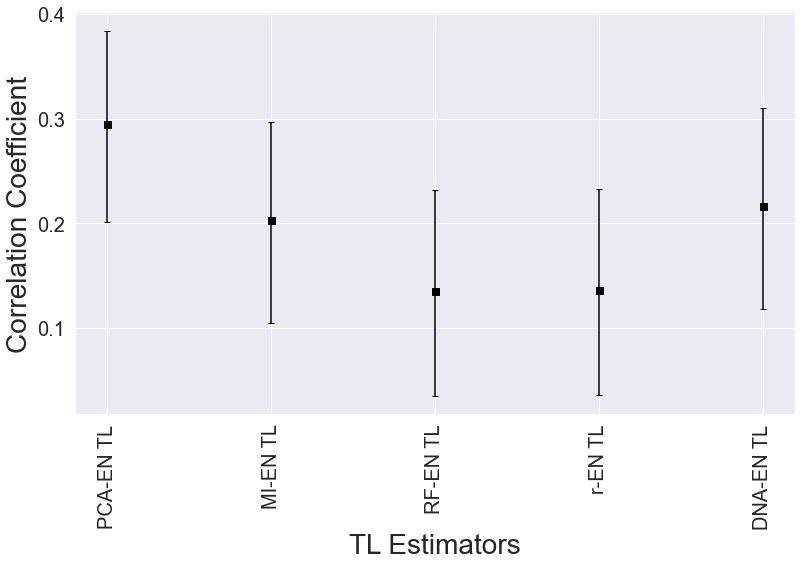

In [67]:
import matplotlib.pyplot as plt
import numpy as np

x_ticks = ("PCA-EN TL", "MI-EN TL", "RF-EN TL", "r-EN TL", "DNA-EN TL")

x = np.array([0, 1, 2, 3, 4])

y = np.array([0.295, 0.203, 0.135, 0.136, 0.216])

err = np.array([[0.295-0.201, 0.203-0.105, 0.135-0.035, 0.136-0.036, 0.216-0.118],
                [0.384-0.295, 0.297-0.203, 0.232-0.135, 0.233-0.136, 0.31-0.216]])

plt.errorbar(x=x, y=y, yerr=err, color="black", capsize=3,
             linestyle="None",
             marker="s", markersize=7, mfc="black", mec="black")

plt.xticks(x, x_ticks, rotation=90, fontsize=20); plt.yticks(fontsize=20)
plt.xlabel('TL Estimators', fontsize=28); plt.ylabel('Correlation Coefficient', fontsize=28)
plt.tight_layout()
plt.show()